______________________________________
# <center>**Trabajo Practico Nº1 para la Materia *Organización de Datos***</center>

*Integrantes*: 
- 103963	Carolina Di Matteo	cdimatteo@fi.uba.ar
- 101231	Pablo Salvador Dimartino	pdimartino@fi.uba.ar
- 100113	Juan Sebastian Burgos	jsburgos@fi.uba.ar
- 104415	Valentina Laura Correa	vcorrea@fi.uba.ar

*Grupo*: 14

*Repositorio*: [github](https://github.com/valencorrea/7506R-2C2022-GRUPO14)

*Curso*: Rodriguez

*Cuatrimestre*: 2c2022
______________________________________



**Set Up**

In [497]:
pip install 'dtreeviz'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [498]:
pip install 'geopandas'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [499]:
#Importación de librerías
import dtreeviz.trees as dtreeviz

import numpy as np
import cmath as math

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mticker
import pandas as pd
import geopandas as gpd

import seaborn as sns

import scipy as sc

import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, KFold, RandomizedSearchCV, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


#Configuración de Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#Ejecución con Drive
from google.colab import drive
drive.mount('/content/drive')
properati = pd.read_csv('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/properati_argentina_2021.csv')
# properati=pd.read_csv('properati_argentina_2021.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#  **1. Análisis Exploratorio y Preprocesamiento de Datos**

## **1a. Exploración Inicial**


Como se indica inicialmente en el enunciado del trabajo práctico, prodecemos a hacer una división de nuestro data set con el cual vamos a trabajar. 

Lo que haremos será definir un 80% del mismo como el conjunto de entrenamiento, y el 20% restante lo usaremos para poder testear nuevos valores.

In [500]:
df_original = properati.copy()
df = df_original.sample(frac=0.8, random_state=200)
test = df_original.drop(df.index)

A continuación se realizará un análisis general de cada una de las variables presentes en el dataframe.

In [501]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Actualmente los únicos dos tipos de datos que tenemos son Float64 y Object.

Viendo las primeras entradas, podemos observar que el tipo Object oculta fechas que se adecuan mejor al tipo de datos DateTime.

In [502]:
df.head(5)

id  start_date    end_date  created_on  \
160116  JWtrhLm/BULQ5NeyL9xoqA==  2021-07-14  2021-08-21  2021-07-14   
92828   1gMQ4rXcpnPs+hhvW11Jdw==  2021-08-03  2021-10-28  2021-08-03   
327725  olHo7dLW4pHQnVQhAuv6/Q==  2021-12-14  2022-01-27  2021-12-14   
366457  GWMhOXhNCdPicnYbmZpT3w==  2021-04-10  2021-06-05  2021-04-10   
19975   p7gmyqzdOy/+odHwH5oPyg==  2021-01-27  2021-06-05  2021-01-27   

          latitud   longitud                place_l2       place_l3 place_l4  \
160116 -34.597419 -58.403760         Capital Federal       Recoleta      NaN   
92828  -34.622385 -58.448886         Capital Federal      Caballito      NaN   
327725        NaN        NaN  Bs.As. G.B.A. Zona Sur       La Plata      NaN   
366457        NaN        NaN  Bs.As. G.B.A. Zona Sur       La Plata      NaN   
19975  -34.618084 -58.359912         Capital Federal  Puerto Madero      NaN   

       place_l5  place_l6 operation    property_type  property_rooms  \
160116      NaN       NaN     Venta     Departamento             1.0   
92828       NaN       NaN     Venta     Departamento             4.0   
327725      NaN       NaN     Venta  Local comercial            10.0   
366457      NaN       NaN     Venta             Casa             3.0   
19975       NaN       NaN     Venta     Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
160116                1.0                    41.0                      37.0   
92828                 3.0                   113.0                      97.0   
327725                NaN                   230.0                     230.0   
366457                2.0                     NaN                     190.0   
19975                 1.0                    70.0                      65.0   

        property_price property_currency  \
160116             NaN               NaN   
92828         288000.0               USD   
327725        250000.0               USD   
366457        300000.0               USD   
19975         450000.0               USD   

                                           property_title  
160116  Excelente monoambiente con balcón Apto profesi...  
92828   Vta. Dpto. 4amb, Caballito, balcón aterrazado ...  
327725                                   Local - La Plata  
366457                           Casa - Campos de Roca II  
19975           Departamento con Cochera en Puerto Madero

### Preparación de los datasets

---

Aplicamos los filtros necesarios que figuran en los requerimientos, y cambiamos el dtype de las fechas a DateTime.

In [503]:
df = df.loc[df['property_type'].isin(["Casa", "PH", "Departamento"])].loc[df['place_l2'].isin(["Capital Federal"])].loc[df['operation'].isin(["Venta"])].loc[df['property_currency'].isin(["USD"])]
df['start_date'] = pd.to_datetime(df['start_date'])
df['created_on'] = pd.to_datetime(df['created_on'])
df.replace(to_replace="9999-12-31", value="", inplace=True)
df['end_date'] = pd.to_datetime(df['end_date'])

max_end_date = max(df['end_date'])
df['start_date'] = df['start_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['start_date']))
df['end_date'] = df['end_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max_end_date.toordinal())
df['created_on'] = df['created_on'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['created_on']))


df.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Replicamos los filtros realizados para el dataset de test:

In [504]:
test = test.loc[test['property_type'].isin(["Casa", "PH", "Departamento"])].loc[test['place_l2'].isin(["Capital Federal"])].loc[test['operation'].isin(["Venta"])].loc[test['property_currency'].isin(["USD"])]
test['start_date'] = pd.to_datetime(test['start_date'])
test['created_on'] = pd.to_datetime(test['created_on'])
test.replace(to_replace="9999-12-31", value="", inplace=True)
test['end_date'] = pd.to_datetime(test['end_date'])

max_end_date = max(test['end_date'])
test['start_date'] = test['start_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(test['start_date']))
test['end_date'] = test['end_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max_end_date.toordinal())
test['created_on'] = test['created_on'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(test['created_on']))

test.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

### Descripción de Campos

---

A continuación, realizamos una descripción de cada una de las variables del dataset e indicamos cuál de ellas corresponde a una del tipo cualitativa o cuantitativa.

`id`: Identificador del aviso

`start_date`: Fecha de alta del aviso

`end_date`: Fecha de baja del aviso

`created_on`: Fecha de alta de la primera versión del aviso

`latitud`: Ubicación geográfica

`longitud`: Ubicación geográfica

`place_l2`: Nivel administrativo 2, usualmente provincia

`place_l3`: Nivel administrativo 3, usualmente ciudad

`place_l4`: Nivel administrativo 4, usualmente barrio

`place_l5`: Nivel administrativo 5

`place_l6`: Nivel administrativo 6

`operation`: Tipo de operación (venta, alquiler), variable cualitativa

`property_type`: Tipo de propiedad (casa, departamento, ph), variable cualitativa

`property_rooms`: Cantidad de ambientes, variable cuantitativa

`property_bedrooms`: Cantidad de dormitorios, variable cuantitativa

`property_surface_total`: Superficie total en metros cuadrados

`property_surface_covered`: Superficie cubierta en metros cuadrados

`property_price`: Precio publicado en el anuncio

`property_currency`: Moneda del precio publicado, variable cualitativa

`property_title`: Título del anuncio

### Variables Cuantitativas: Medidas de Resumen

---

Calculamos, para la totalidad de las variables que nos brinda el dataset:
- media
- mediana
- q1
- q3 
- moda

In [505]:
df_cuantitativas = df[['property_rooms', 'property_bedrooms']]

In [506]:
df_cuantitativas.describe().loc[['mean', '25%', '75%', 'std']].append(df_cuantitativas.median().rename("median"))

property_rooms  property_bedrooms
mean          2.825187           2.018113
25%           2.000000           1.000000
75%           4.000000           3.000000
std           1.423749           1.134732
median        3.000000           2.000000

### Variables Cualitativas: Cantidades y Frecuencias

---

Realizamos, para las variables `place_l3`, `place_l4` y `property_type` un cálculo de los diferentes valores así también como sus respectivas frecuencias.

In [507]:
print(f"place_l3 tiene {df.nunique()['place_l3']} valores diferentes")

place_l3 tiene 57 valores diferentes


Text(0.5, 0, 'Variable place_l3')

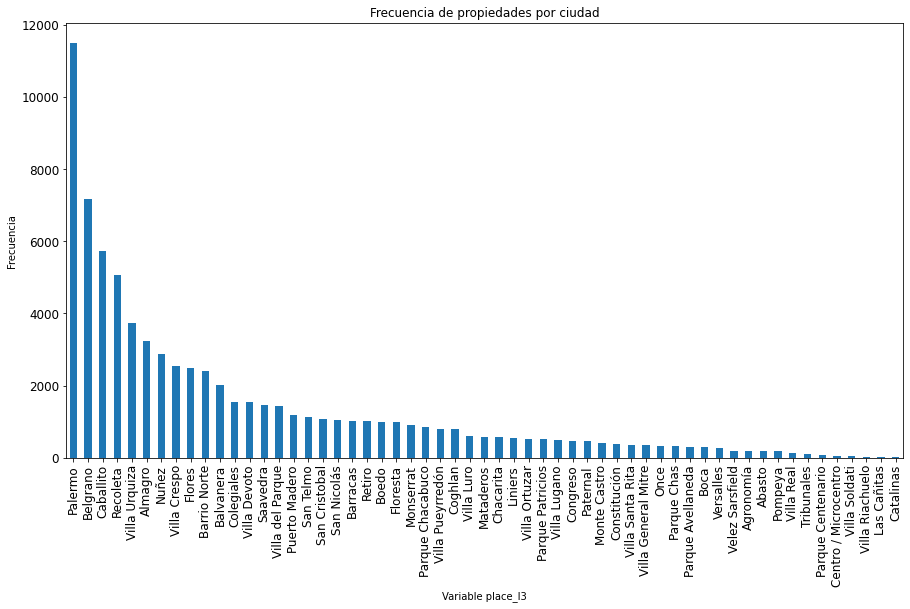

In [508]:
fig, ax = plt.subplots()
df['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12)
plt.title('Frecuencia de propiedades por ciudad')
plt.ylabel('Frecuencia')
plt.xlabel('Variable place_l3')

In [509]:
print(f"place_l4 tiene {df.nunique()['place_l4']} valores diferentes")

place_l4 tiene 4 valores diferentes


Text(0.5, 0, 'Variable place_l4')

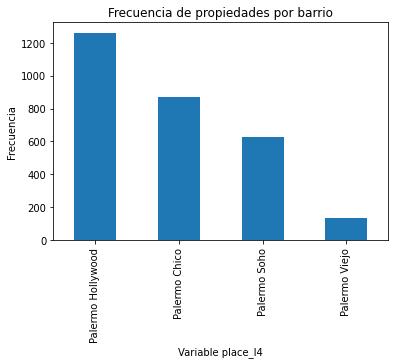

In [510]:
fig, ax = plt.subplots()
df['place_l4'].value_counts().plot(ax=ax, kind='bar')
plt.title('Frecuencia de propiedades por barrio')
plt.ylabel('Frecuencia')
plt.xlabel('Variable place_l4')

In [511]:
print(f"property_type tiene {df.nunique()['property_type']} valores diferentes")

property_type tiene 3 valores diferentes


Text(0.5, 0, 'Variable property_type')

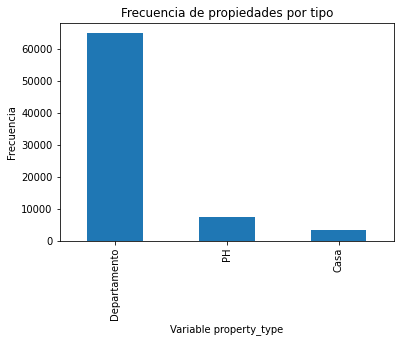

In [512]:
fig, ax = plt.subplots()
df['property_type'].value_counts().plot(ax=ax, kind='bar')
plt.title('Frecuencia de propiedades por tipo')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_type')

### Determinación de Variables Irrelevantes

---

Finalmente, podremos decir que dejamos fuera de este análisis particular a las a las siguientes variables que detallamos a continuación:

- `id`: No contiene información relevante para el análisis.
- `operation`: Sólo hay un tipo de operación según lo solicitado en la consigna y es "Venta", con lo cual la consideramos irrelevante en el análisis.
- `property_currency`: Sólo hay un tipo de cambio según lo solicitado en la consigna y es "USD", con lo cual la consideramos irrelevante en el análisis.
- `place_l5`: De analizar previamente el dataset con el cual estamos trabajando, detectamos que la columna en cuestión se encuentra vacía, con lo cual la consideramos irrelevante en el análisis.
- `place_l6`: De analizar previamente el dataset con el cual estamos trabajando, detectamos que la columna en cuestión se encuentra vacía, con lo cual la consideramos irrelevante en el análisis.
- `property_title`: De conocer previamente la información que contiene el dataset, sabemos que la variable en cuestión almacena un único título por publicación, con lo cual la consideramos irrelevante en el análisis.

Procedemos a eliminar del dataset las mismas:

In [513]:
df.drop("id", inplace=True, axis=1)
df.drop("place_l5", inplace=True, axis=1)
df.drop("place_l6", inplace=True, axis=1)
df.drop("operation", inplace=True, axis=1)
df.drop("property_currency", inplace=True, axis=1)
df.drop("property_title", inplace=True, axis=1)
df.columns.tolist()

['start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price']

Replicamos la eliminación de variables irrelevantes para el dataset de test:

In [514]:
test.drop("id", inplace=True, axis=1)
test.drop("place_l5", inplace=True, axis=1)
test.drop("place_l6", inplace=True, axis=1)
test.drop("operation", inplace=True, axis=1)
test.drop("property_currency", inplace=True, axis=1)
test.drop("property_title", inplace=True, axis=1)

### Análisis Gráfico de las Distribuciones de las Variables

---



#### Densidad de la variable `property_price`

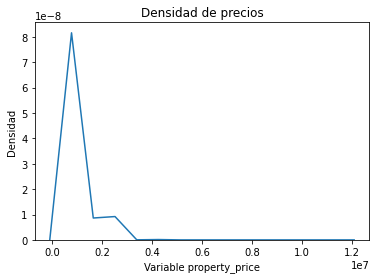

In [515]:
d = sns.kdeplot(data=df.property_price, gridsize=15).set(title="Densidad de precios",xlabel="Variable property_price",ylabel="Densidad")

#### Densidad de la variable `property_rooms`

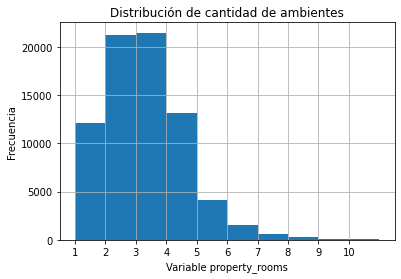

In [516]:
plt.hist(df.property_rooms, bins=10, range=(1,11))
plt.title('Distribución de cantidad de ambientes')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_rooms')
plt.xticks(np.arange(1,11,1))
plt.grid(True)
plt.show()

#### Densidad de la variable `property_bedrooms`

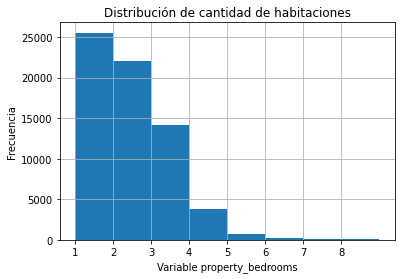

In [517]:
plt.hist(df.property_bedrooms, bins=8, range=(1,9))
plt.title('Distribución de cantidad de habitaciones')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_bedrooms')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

#### Densidad de la variable `property_surface_covered`

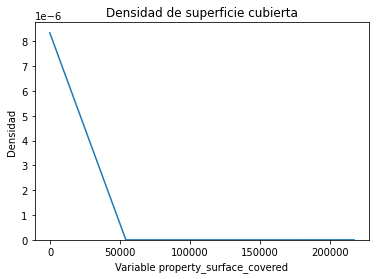

In [518]:
d = sns.kdeplot(data=df.property_surface_covered, gridsize=5).set(title="Densidad de superficie cubierta",xlabel="Variable property_surface_covered",ylabel="Densidad")

### Análisis de las Correlaciones existentes entre las Variables

---

In [519]:
#graf_pairplot = sns.pairplot(data=df)

### Conclusiones
----

Luego de tener este primer acercamiento con el dataset pudimos realizar varias observaciones. 

En un primer lugar, luego de explorar las distintas variables que este comprendía, llegamos a la conclusión de que contábamos con varias que ante nuestro problema no iban a presentar relevancia. Es por esta razón que decidimos suprimirlas de nuestros datasets de trabajo, tanto para train como para el que luego usaremos para realizar los tests. 

Además de esto, notamos que teníamos diferencias en los tipos de variables con las cuales contábamos, razón por la cual decidimos explicitar las que se correspondian a cuantitativas o cualitativas, ya que estas aclaraciones luego nos serán de utilidad al momento de determinar los gráficos a realizar. Estos además, nos sirvieron para identificar y tener dimensión de las distribuciones y que tan relacionadas están nuestras variables entre sí. 

Por último realizamos los cálculos de las medidas de resumen sobre estas variables resultantes, las cuales estaremos utilizando para realizar diferentes operaciones a lo largo del trabajo.

## **1b. Datos Faltantes**

A continuación se realizara un análisis sobre los datos faltantes del dataframe.

### Análisis a Nivel Columna

---



Graficamos, para cada variable, el porcentaje (diferente de cero) de datos faltantes con respecto al total del dataset en escala logarítmica.

Text(0.5, 0, 'Variables del dataset')

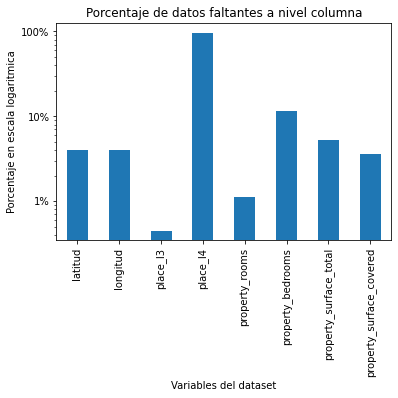

In [520]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(PercentFormatter())
(df.isnull().sum() * 100 / len(df)).replace(0,np.nan).dropna(axis=0,how="all").plot(ax=ax, kind='bar')
plt.title('Porcentaje de datos faltantes a nivel columna')
plt.ylabel('Porcentaje en escala logaritmica')
plt.xlabel('Variables del dataset')

### Análisis a Nivel Fila

---



Graficamos el porcentaje de filas con n datos faltantes con respecto al total del dataset.

Text(0.5, 0, 'Cantidad de datos faltantes')

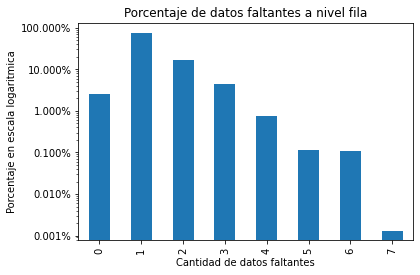

In [521]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(PercentFormatter(decimals=3))
(df.isnull().sum(axis=1).value_counts().sort_index() * 100 / len(df)).plot(ax=ax, kind='bar')
plt.title('Porcentaje de datos faltantes a nivel fila')
plt.ylabel('Porcentaje en escala logaritmica')
plt.xlabel('Cantidad de datos faltantes')

### Reparación de Valores Faltantes

---



A continuación se detallan posibles estrategias para reparar los valores faltantes del dataset.

Guardamos una copia del dataset sin imputaciones realizadas para comparar más adelante:

In [522]:
df_sin_reparacion = df.copy()

#### Variables `start_date`, `end_date` y `created_on`

Puesto que no hay valores faltantes para las variables de fechas, no es necesario realizar una reparación de las mismas.

#### Variables `place_l3` y `place_l4`

Reemplazamos las locaciones no definidas por el nivel superior:

In [523]:
df.place_l3.fillna(df.place_l2, inplace=True)
df.place_l4.fillna(df.place_l3, inplace=True)

Calculamos la cantidad de datos nulos restantes para la variable `place_l3`:


In [524]:
df["place_l3"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `place_l4`:


In [525]:
df["place_l4"].isna().sum()

0

Veamos que, al realizar esta imputación de datos las variables `place_l2` y `place_l3` quedan obsoletas pues la información de relevancia respecto a la ubicación de la propiedad en venta se encuentra en la variable `place_l4` y es por esta razón que podremos eliminarla del dataset:

In [526]:
df.drop("place_l2", inplace=True, axis=1)
df.drop("place_l3", inplace=True, axis=1)

Replicamos para el dataset de test:

In [527]:
test.place_l3.fillna(test.place_l2, inplace=True)
test.place_l4.fillna(test.place_l3, inplace=True)

In [528]:
test["place_l3"].isna().sum()

0

In [529]:
test["place_l4"].isna().sum()

0

In [530]:
test.drop("place_l2", inplace=True, axis=1)
test.drop("place_l3", inplace=True, axis=1)

#### Variables `latitud` y `longitud`

Imputamos, a partir de las medias de las variables `latitud` y `longitud` agrupando según los valores de `place_l4` los valores faltantes de `latitud` y `longitud`. Para replicar este comportamiento en el dataset de test, almacenamos en un diccionario de medias las correspondientes a cada barrio. Para visualizar las diferencias en la variable previas y posteriores a la imputación de datos, graficamos -a modo de ejemplo- la densidad para el barrio de Palermo:

In [531]:
medians_latitudes = {}

for barrio in df["place_l4"].unique() :
    lat_median = df.loc[(df["place_l4"] == barrio) & (df['latitud'].notna())].latitud.median()
    df.loc[(df["place_l4"] == barrio) & (df['latitud'].isna()), "latitud"] = df.loc[(df["place_l4"] == barrio) & (df['latitud'].isna()), "latitud"].fillna(lat_median)
    medians_latitudes[barrio] = lat_median

Veamos los valores resultantes en el diccionaro de medias de latitudes:

In [532]:
medians_latitudes

{'Caballito': -34.6194061,
 'Puerto Madero': -34.6126394,
 'Balvanera': -34.60831005,
 'San Nicolás': -34.6030779,
 'Retiro': -34.59610936185,
 'Villa Urquiza': -34.5736133,
 'Villa del Parque': -34.604529691799996,
 'Colegiales': -34.5760225,
 'Villa Crespo': -34.598273692099994,
 'Almagro': -34.6058615,
 'San Telmo': -34.6209352,
 'Flores': -34.6286921369,
 'Palermo': -34.5820981,
 'Palermo Chico': -34.5794167,
 'Nuñez': -34.548096650000005,
 'Barracas': -34.6358354,
 'Villa General Mitre': -34.610502100000005,
 'Belgrano': -34.5623790515,
 'Parque Avellaneda': -34.6448557,
 'Parque Chacabuco': -34.6347007,
 'Versalles': -34.6296804,
 'Recoleta': -34.5920227,
 'Boedo': -34.62756628955,
 'Monte Castro': -34.621131,
 'Palermo Hollywood': -34.58057085,
 'Villa Real': -34.6207965,
 'Boca': -34.63204751155,
 'Barrio Norte': -34.59381705,
 'Saavedra': -34.5512603978,
 'Coghlan': -34.5614349,
 'Velez Sarsfield': -34.63229,
 'Mataderos': -34.6551649,
 'Villa Ortuzar': -34.5821500876,
 'Pater

In [533]:
medians_longitudes = {}

for barrio in df["place_l4"].unique() :
    long_median = df.loc[(df["place_l4"] == barrio) & (df['longitud'].notna())].longitud.median()
    df.loc[(df["place_l4"] == barrio) & (df['longitud'].isna()), "longitud"] = df.loc[(df["place_l4"] == barrio) & (df['longitud'].isna()), "longitud"].fillna(long_median)
    medians_longitudes[barrio] = long_median

Veamos los valores resultantes en el diccionaro de medias de longitudes:

In [534]:
medians_longitudes

{'Caballito': -58.4412248,
 'Puerto Madero': -58.3618883,
 'Balvanera': -58.402031449999996,
 'San Nicolás': -58.3834625,
 'Retiro': -58.3785708,
 'Villa Urquiza': -58.4861351,
 'Villa del Parque': -58.48984955,
 'Colegiales': -58.45016895,
 'Villa Crespo': -58.4407171,
 'Almagro': -58.4223603,
 'San Telmo': -58.3748503,
 'Flores': -58.46332195,
 'Palermo': -58.42346605,
 'Palermo Chico': -58.4072524,
 'Nuñez': -58.46633,
 'Barracas': -58.3739745,
 'Villa General Mitre': -58.4683198,
 'Belgrano': -58.4544909,
 'Parque Avellaneda': -58.477562,
 'Parque Chacabuco': -58.4379678,
 'Versalles': -58.5200459,
 'Recoleta': -58.3959194307,
 'Boedo': -58.41800275,
 'Monte Castro': -58.504708,
 'Palermo Hollywood': -58.435209650000004,
 'Villa Real': -58.5244913,
 'Boca': -58.3629598,
 'Barrio Norte': -58.40413825,
 'Saavedra': -58.4824258,
 'Coghlan': -58.474658500000004,
 'Velez Sarsfield': -58.4926237,
 'Mataderos': -58.5035614,
 'Villa Ortuzar': -58.4689315,
 'Paternal': -58.4646755,
 'Parque

Calculamos la cantidad de datos nulos restantes para la variable `latitud`:


In [535]:
df["latitud"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `longitud`:


In [536]:
df["longitud"].isna().sum()

0

Replicamos para el dataset de test:

In [537]:
for barrio in test["place_l4"].unique() :
    lat_median = medians_latitudes[barrio]
    test.loc[(test["place_l4"] == barrio) & (test['latitud'].isna()), "latitud"] = test.loc[(test["place_l4"] == barrio) & (test['latitud'].isna()), "latitud"].fillna(lat_median)

In [538]:
for barrio in test["place_l4"].unique() :
    long_median = medians_longitudes[barrio]
    test.loc[(test["place_l4"] == barrio) & (test['longitud'].isna()), "longitud"] = test.loc[(test["place_l4"] == barrio) & (test['longitud'].isna()), "longitud"].fillna(long_median)

In [539]:
test["latitud"].isna().sum()

0

In [540]:
test["longitud"].isna().sum()

0

#### Variables `property_surface_total` y `property_surface_covered`

Cuando se tiene la superficie total pero no la cubierta o viceversa, reemplazamos los valores faltantes con su contraparte

In [541]:
df.property_surface_total.fillna(df.property_surface_covered, inplace=True)
df.property_surface_covered.fillna(df.property_surface_total, inplace=True)

Calculamos la cantidad de datos nulos restantes para la variable `property_surface_total`:


In [542]:
df["property_surface_total"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `property_surface_covered`:

In [543]:
df["property_surface_covered"].isna().sum()

0

Replicamos para el dataset de test:

In [544]:
test.property_surface_total.fillna(test.property_surface_covered, inplace=True)
test.property_surface_covered.fillna(test.property_surface_total, inplace=True)

In [545]:
test["property_surface_total"].isna().sum()

0

In [546]:
test["property_surface_covered"].isna().sum()

0

#### Variables `property_rooms` y `property_bedrooms`

Reemplazamos la cantidad de habitaciones no definidas por la media calculada filtrando por cantidad total de dormitorios. Para replicar este comportamiento en el dataset de test, almacenamos en un diccionario de medias las correspondientes a cada cantidad de ambientes.

In [547]:
cant = df.loc[(df['property_rooms'].isna()) & (df['property_bedrooms'].notna())].property_bedrooms.value_counts().index.values
medians_rooms = {}

for i in cant:
    median = df.loc[(df['property_rooms'].notna()) & (df['property_bedrooms'] == i)].property_rooms.median()
    df.loc[(df['property_rooms'].isna()) & (df["property_bedrooms"] == i), "property_rooms"] = df.loc[(df['property_rooms'].isna()) & (df["property_bedrooms"] == i), "property_rooms"].fillna(median)
    medians_rooms[i] = median

Veamos los valores resultantes en el diccionaro de medias de ambientes:

In [548]:
medians_rooms

{3.0: 4.0,
 2.0: 3.0,
 4.0: 5.0,
 1.0: 2.0,
 5.0: 6.0,
 6.0: 7.0,
 7.0: 8.0,
 10.0: 12.0,
 8.0: 9.0,
 11.0: 11.0,
 9.0: 10.0,
 14.0: 15.0,
 13.0: 15.0,
 12.0: 14.0}

Calculamos la cantidad de datos nulos restantes para la variable `property_rooms`:


In [549]:
df["property_rooms"].isna().sum()

341

Para eliminar los últimos valores nulos en las columnas de ambientes, lo completamos con una regresión en funcion de la superficie cubierta:

In [550]:
df_rooms = df.loc[df['property_rooms'].notna()]
reg_rooms = LinearRegression().fit(np.array(df_rooms['property_surface_covered']).reshape(-1, 1), df_rooms['property_rooms'])

In [551]:
df_topredict = df.loc[df['property_rooms'].isna()]['property_surface_covered']
df['property_rooms'] = df.apply(lambda x: round(reg_rooms.predict([[x.property_surface_covered]])[0]) if pd.isna(x.property_rooms) else x.property_rooms, axis=1)

Calculamos la cantidad de datos nulos restantes para la variable `property_rooms`:


In [552]:
df["property_rooms"].isna().sum()

0

Luego reemplazamos la cantidad total de dormitorios no definidas por la media calculada filtrando por cantidad de ambientes.

Esto redujo el porcentaje de valores no definidos para los dormitorios y ambientes a menos de 1%, desde 10% y 1,5% respectivamente.

In [553]:
cant = df.loc[(df['property_bedrooms'].isna()) & (df['property_rooms'].notna())].property_rooms.value_counts().index.values
medians_bedrooms = {}

for i in cant:
    median = df.loc[df['property_rooms'] == i].property_bedrooms.median()
    if pd.isna(median):
        median = df.loc[df['property_rooms'] == i]['property_rooms'].iloc[0]
    df.loc[(df['property_bedrooms'].isna()) & (df["property_rooms"] == i), "property_bedrooms"] = df.loc[(df['property_bedrooms'].isna()) & (df["property_rooms"] == i), "property_bedrooms"].fillna(median)
    medians_bedrooms[i] = median

Veamos los valores resultantes en el diccionaro de medias de dormitorios:

In [554]:
medians_bedrooms

{1.0: 1.0,
 3.0: 2.0,
 2.0: 1.0,
 4.0: 3.0,
 5.0: 4.0,
 6.0: 4.0,
 7.0: 4.0,
 10.0: 6.0,
 12.0: 8.0,
 9.0: 5.0,
 8.0: 5.0,
 15.0: 13.0,
 11.0: 8.0,
 35.0: 35.0,
 33.0: 33.0,
 14.0: 11.0}

Calculamos la cantidad de datos nulos restantes para la variable `property_bedrooms`:



In [555]:
df["property_bedrooms"].isna().sum()

0

Replicamos para el dataset de test:

In [556]:
cant = test.loc[(test['property_rooms'].isna()) & (test['property_bedrooms'].notna())].property_bedrooms.value_counts().index.values

for i in cant:
    median = medians_rooms[i]
    test.loc[(test['property_rooms'].isna()) & (test["property_bedrooms"] == i), "property_rooms"] = test.loc[(test['property_rooms'].isna()) & (test["property_bedrooms"] == i), "property_rooms"].fillna(median)

In [557]:
test['property_rooms'] = test.apply(lambda x: round(reg_rooms.predict([[x.property_surface_covered]])[0]) if pd.isna(x.property_rooms) else x.property_rooms, axis=1)

In [558]:
test["property_rooms"].isna().sum()

0

In [559]:
cant = test.loc[(test['property_bedrooms'].isna()) & (test['property_rooms'].notna())].property_rooms.value_counts().index.values

for i in cant:
    if i not in medians_bedrooms:
        median = test.loc[test['property_rooms'] == i]['property_rooms'].iloc[0]
    else:
        median = medians_bedrooms[i]
    test.loc[(test['property_bedrooms'].isna()) & (test["property_rooms"] == i), "property_bedrooms"] = test.loc[(test['property_bedrooms'].isna()) & (test["property_rooms"] == i), "property_bedrooms"].fillna(median)

In [560]:
test["property_bedrooms"].isna().sum()

0

#### Conclusiones

A partir de la presencia de valores faltantes en cada una de las variables trabajadas, realizamos distintos tipos de imputaciones según lo que requería cada una, entre ellos: completar con el nivel inmediatamente anterior, reemplazar con el valor de la media correspondiente, y, predecir mediante regresión lineal.

Para las variables `place_l3` y `place_l4` tomamos la decisión de completar los valores faltantes con el valor previo dado que las mismas son de tipo `str` y no admiten cálculos numéricos. A continuación, podemos apreciar la diferencia obtenida entre las distribuciones de las variables previas y posteriores a la imputación de datos.

In [561]:
#fig, ax = plt.subplots()
#df_sin_reparacion['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="red", alpha=0.8)
#df['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="green", alpha=0.5)
#plt.title('Frecuencia de Propiedades por Ciudad')
#plt.ylabel('Frecuencia')
#plt.xlabel('Ciudades')

Como podemos notar, al ser bajo el porcentaje de datos faltantes para la variable `place_l3`, la distribución de la misma no presenta grandes cambios a pesar de la imputación realizada.

Text(0.5, 0, 'Barrios')

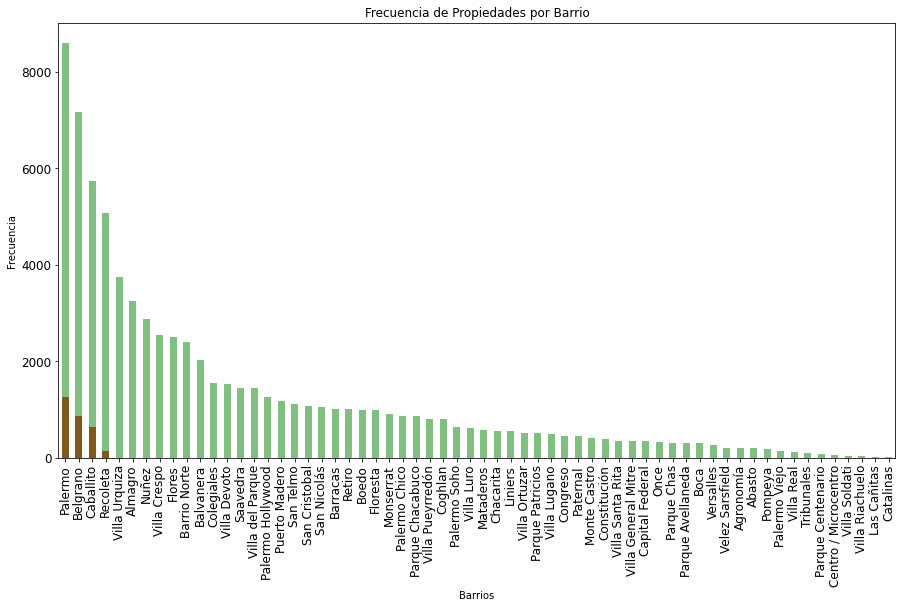

In [562]:
fig, ax = plt.subplots()
df_sin_reparacion['place_l4'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="red", alpha=0.8)
df['place_l4'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="green", alpha=0.5)
plt.title('Frecuencia de Propiedades por Barrio')
plt.ylabel('Frecuencia')
plt.xlabel('Barrios')

Por el contrario de lo observado en el gráfico anterior, dado que la variable `place_l4` tenía un alto grado de valores faltantes (casi del 100% sobre todo el dataset), y puesto que los mismos fueron reemplazados por su antecesor inmediato (es decir: los valores existentes en `place_l3`) es esperable que la distribución de la misma tenga un cambio significativo luego de la imputación realizada. Más aún: es inclusive muy similar a la distribución de `place_l3`.

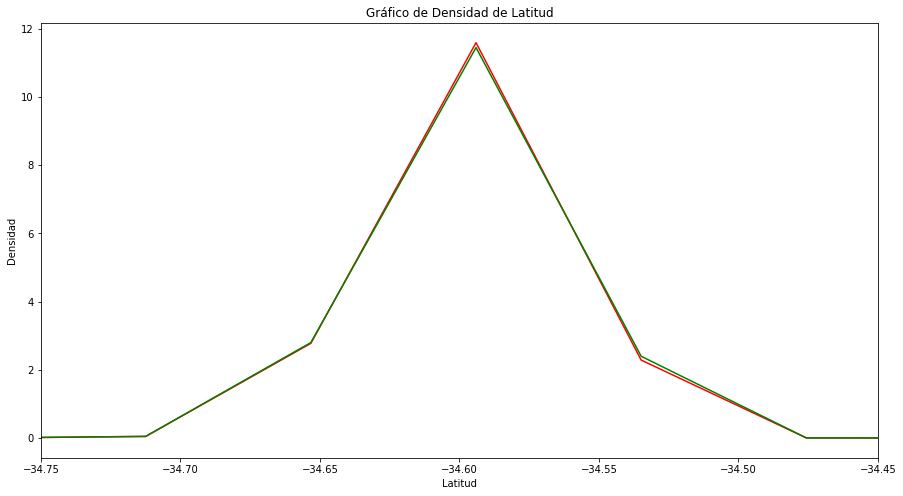

In [563]:
df_sin_reparacion.latitud.plot.density(color = "red")
grf = df.latitud.plot.density(color = "green", figsize=(15,8), xlim = (-34.75,-34.45)).set(xlabel="Latitud", ylabel="Densidad", title="Gráfico de Densidad de Latitud")

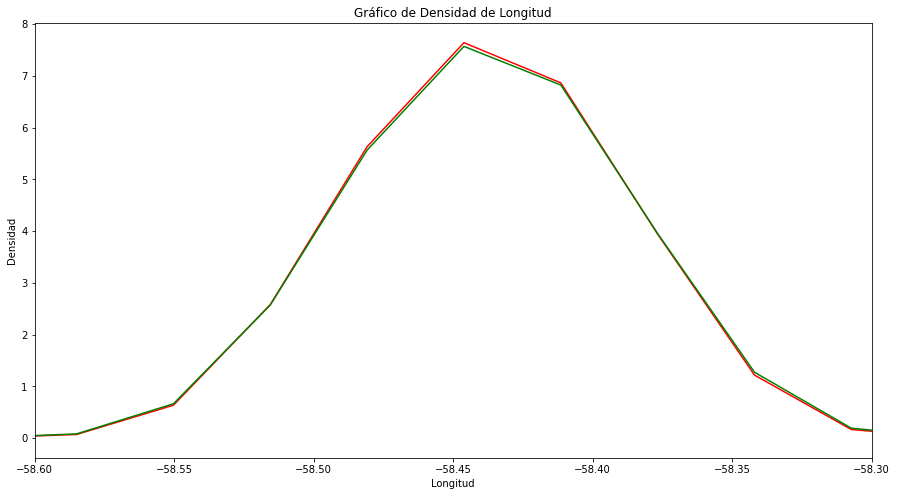

In [564]:
df_sin_reparacion.longitud.plot.density(color = "red")
grf = df.longitud.plot.density(color = "green", figsize=(15,8), xlim = (-58.6,-58.3)).set(xlabel="Longitud", ylabel="Densidad", title="Gráfico de Densidad de Longitud")

Tanto para las variables de `latitud` y `longitud`, el método que utilizamos fue el de reemplazar los valores faltantes por las medias correspondientes. Como podemos ver en los gráficos anteriores, estas variables tenían un pequeño porcentaje de datos ausentes, de modo que sus distribuciones no tienen cambios significativos a pesar de la imputación realizada.

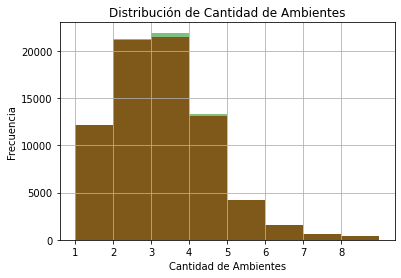

In [565]:
plt.hist(df_sin_reparacion.property_rooms, bins=8, range=(1,9), color="red", alpha=0.8)
plt.hist(df.property_rooms, bins=8, range=(1,9), color="green", alpha=0.5)
plt.title('Distribución de Cantidad de Ambientes')
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de Ambientes')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

Teniendo en cuenta que la proporción de valores faltantes en la variable `property_rooms` representa una cantidad significativa pero no de alto impacto sobre la totalidad del dataset, es esperable que al comparar los resultados obtenidos respecto de los iniciales no obtengamos una alta diferencia entre los mismos.

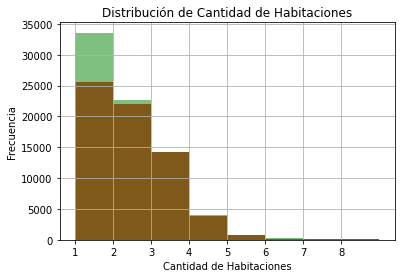

In [566]:
plt.hist(df_sin_reparacion.property_bedrooms, bins=8, range=(1,9), color="red", alpha=0.8)
plt.hist(df.property_bedrooms, bins=8, range=(1,9), color="green", alpha=0.5)
plt.title('Distribución de Cantidad de Habitaciones')
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de Habitaciones')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

A diferencia del análisis previo, podemos observar que al aumentar la cantidad de datos faltantes para la variable `property_bedrooms` -respecto de `property_rooms`-, tenemos un mayor nivel de diferencia entre las distribuciones de la variable previa y posteriormente a la imputación realizada.

Finalmente, podemos verificar que la totalidad de datos faltantes sobre los datasets tanto de train como de test fue reparada:

In [567]:
df.isna().sum()

start_date                  0
end_date                    0
created_on                  0
latitud                     0
longitud                    0
place_l4                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
dtype: int64

In [568]:
test.isna().sum()

start_date                  0
end_date                    0
created_on                  0
latitud                     0
longitud                    0
place_l4                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
dtype: int64

## **1c. Valores atípicos**

A continuación realizaremos un análisis sobre los valores atípicos presentes en el dataset.

Generamos una función de impresión de medidas del gráfico Box Plot para una columna:

In [569]:
def print_box_plot_medidas(df_c):
  Q1 = df_c.describe().get("25%")
  Q3 = df_c.describe().get("75%")

  print(f"El valor de Q1 es: {Q1}")
  print(f"El valor de Q3 es: {Q3}")

  IQR = Q3 - Q1

  out_inf = Q1 - 1.5 * IQR
  out_sup = Q3 + 1.5 * IQR

  print(f"El limite inferior del Q1 es: {out_inf}")
  print(f"El limite superior del Q3 es: {out_sup}")

### Análisis Univariado

---

#### Técnica Box Plot

Hagamos un gráfico de tipo box plot para visualizar los posibles valores atípicos de cada una de las variables presentes en el universo de datos numéricos:

##### Variable `start_date`

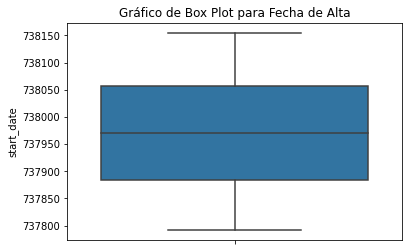

In [570]:
sns.boxplot(y=df.start_date)
plt.title("Gráfico de Box Plot para Fecha de Alta")
plt.show()

In [571]:
print(f"Medidas para Fecha de Alta:")

print_box_plot_medidas(df.start_date)

Medidas para Fecha de Alta:
El valor de Q1 es: 737883.0
El valor de Q3 es: 738057.0
El limite inferior del Q1 es: 737622.0
El limite superior del Q3 es: 738318.0


Del gráfico podemos ver que no existen outliers para la variable en cuestión.

##### Variable `end_date`

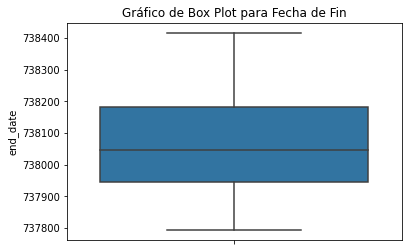

In [572]:
sns.boxplot(y=df.end_date)
plt.title("Gráfico de Box Plot para Fecha de Fin")
plt.show()

In [573]:
print(f"Medidas para Fecha de Fin:")

print_box_plot_medidas(df.end_date)

Medidas para Fecha de Fin:
El valor de Q1 es: 737946.0
El valor de Q3 es: 738182.0
El limite inferior del Q1 es: 737592.0
El limite superior del Q3 es: 738536.0


Nuevamente no observamos outliers por el método de Box Plot.

##### Variable `created_on`

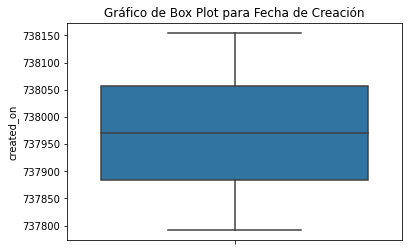

In [574]:
sns.boxplot(y=df.created_on)
plt.title("Gráfico de Box Plot para Fecha de Creación")
plt.show()

In [575]:
print(f"Medidas para Fecha de Creación:")

print_box_plot_medidas(df.created_on)

Medidas para Fecha de Creación:
El valor de Q1 es: 737883.0
El valor de Q3 es: 738057.0
El limite inferior del Q1 es: 737622.0
El limite superior del Q3 es: 738318.0


Nuevamente no observamos outliers por el método de Box Plot.

##### Variable `latitud`

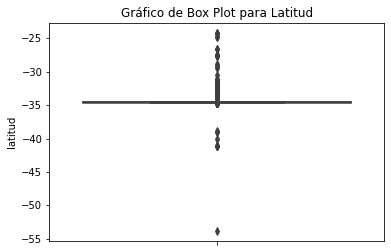

In [576]:
sns.boxplot(y=df.latitud)
plt.title("Gráfico de Box Plot para Latitud")
plt.show()

In [577]:
print(f"Medidas para Latitud:")

df_c = df.latitud

Q1 = df_c.describe().get("25%")
Q3 = df_c.describe().get("75%")

print(f"El valor de Q1 es: {Q1}")
print(f"El valor de Q3 es: {Q3}")

IQR = Q3 - Q1

out_inf = Q1 - 1.5 * IQR
out_sup = Q3 + 1.5 * IQR

print(f"El limite inferior del Q1 es: {out_inf}")
print(f"El limite superior del Q3 es: {out_sup}")

Medidas para Latitud:
El valor de Q1 es: -34.6155326
El valor de Q3 es: -34.5770878
El limite inferior del Q1 es: -34.673199800000006
El limite superior del Q3 es: -34.519420600000004


Si bien este gráfico no nos brinda mucha información, pues los valores límites inferior y superior son muy cercanos y eso nos da la pauta de que hay una gran variabilidad en los datos, podríamos pensar que es extraña la observación que se encuentra por debajo del valor -50. En esta línea, observemos el registro en cuestión:

In [578]:
df[df.latitud < -50]

start_date  end_date  created_on    latitud   longitud  \
457631      737918    738010      737918 -53.788624 -67.718089   

               place_l4 property_type  property_rooms  property_bedrooms  \
457631  Capital Federal  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  
457631                   121.0                     100.0        375000.0

A priori no podríamos realizar una conclusión sólida, puesto que sería conveniente estudiar el resto de las variables en conjunto. Por ejemplo, verificar -utilizando el dato de longitud- si realmente pertenece a una coordenada correspondiente a la Capital Federal.

##### Variable `longitud`

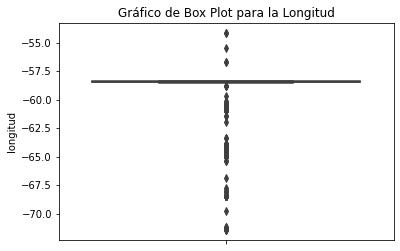

In [579]:
sns.boxplot(y=df.longitud)
plt.title("Gráfico de Box Plot para la Longitud")
plt.show()

In [580]:
print(f"Medidas para Longitud:")

df_c = df.longitud

Q1 = df_c.describe().get("25%")
Q3 = df_c.describe().get("75%")

print(f"El valor de Q1 es: {Q1}")
print(f"El valor de Q3 es: {Q3}")

IQR = Q3 - Q1

out_inf = Q1 - 1.5 * IQR
out_sup = Q3 + 1.5 * IQR

print(f"El limite inferior del Q1 es: {out_inf}")
print(f"El limite superior del Q3 es: {out_sup}")

Medidas para Longitud:
El valor de Q1 es: -58.466182
El valor de Q3 es: -58.40879845
El limite inferior del Q1 es: -58.552257325000014
El limite superior del Q3 es: -58.322723124999996


De igual forma que para el análisis previo, el gráfico y el resumen de las medidas para la variable en cuestión no nos brindan información acerca de valores atípicos reales ya que el rango intercuantil es pequeño. Con este análisis, no podríamos concluir que existen valores atípicos para la variable `longitud`.

##### Variable `property_rooms`

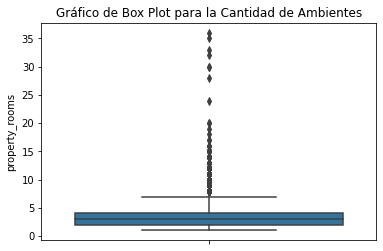

In [581]:
sns.boxplot(y=df.property_rooms)
plt.title("Gráfico de Box Plot para la Cantidad de Ambientes")
plt.show()

In [582]:
print(f"Medidas para Cantidad de Ambientes:")

df_c = df.property_rooms

Q1 = df_c.describe().get("25%")
Q3 = df_c.describe().get("75%")

print(f"El valor de Q1 es: {Q1}")
print(f"El valor de Q3 es: {Q3}")

IQR = Q3 - Q1

out_inf = Q1 - 1.5 * IQR
out_sup = Q3 + 1.5 * IQR

print(f"El limite inferior del Q1 es: {out_inf}")
print(f"El limite superior del Q3 es: {out_sup}")

Medidas para Cantidad de Ambientes:
El valor de Q1 es: 2.0
El valor de Q3 es: 4.0
El limite inferior del Q1 es: -1.0
El limite superior del Q3 es: 7.0


De analizar el gráfico y las medidas, podríamos pensar que una cantidad de ambientes mayor a 7 podría representar un outlier. Ahora bien, tengamos en cuenta que en nuestro universo de datos estamos analizando tanto Departamentos como Casas y PH de modo que no podríamos concluir con firmeza -en este primer análisis univariado- que todas las observaciones por encima de estos límites son valores atípicos.

##### Variable `property_bedrooms`



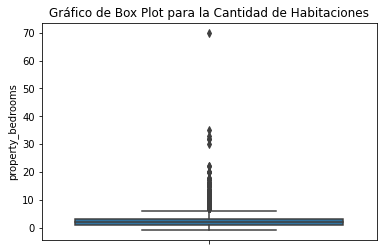

In [583]:
sns.boxplot(y=df.property_bedrooms)
plt.title("Gráfico de Box Plot para la Cantidad de Habitaciones")
plt.show()

In [584]:
print(f"Medidas para Cantidad de Habitaciones:")

df_c = df.property_bedrooms

Q1 = df_c.describe().get("25%")
Q3 = df_c.describe().get("75%")

print(f"El valor de Q1 es: {Q1}")
print(f"El valor de Q3 es: {Q3}")

IQR = Q3 - Q1

out_inf = Q1 - 1.5 * IQR
out_sup = Q3 + 1.5 * IQR

print(f"El limite inferior del Q1 es: {out_inf}")
print(f"El limite superior del Q3 es: {out_sup}")

Medidas para Cantidad de Habitaciones:
El valor de Q1 es: 1.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: -2.0
El limite superior del Q3 es: 6.0


Particularmente para este gráfico, podríamos notar una masa de posibles outliers cerca del límite superior del box plot y una única observación alejada de la masa en cuestión.
Respecto de la masa de posibles valores atípicos, haríamos un razonamiento similar al que realizamos para la variable anterior: tendríamos que hacer un análisis multivariado para poder consolidar una conclusión.
Ahora bien, vale la pena estudiar la observación que supera el 60:

In [585]:
df[df.property_bedrooms > 60]

start_date  end_date  created_on    latitud   longitud    place_l4  \
94998      738057    738182      738057 -34.646632 -58.497902  Villa Luro   

      property_type  property_rooms  property_bedrooms  \
94998  Departamento             3.0               70.0   

       property_surface_total  property_surface_covered  property_price  
94998                    70.0                      70.0        135000.0

Claramente estamos ante una situación de valor atípico, de modo que procedemos a eliminar el mismo:

In [586]:
df.drop(df[df.property_bedrooms > 60].index, inplace=True)

Replicamos para el dataset de test:

In [587]:
test.drop(test[test.property_bedrooms > 60].index, inplace=True)

Nuevamente, realizamos el gráfico de Box Plot:

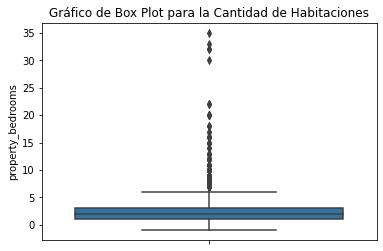

In [588]:
sns.boxplot(y=df.property_bedrooms)
plt.title("Gráfico de Box Plot para la Cantidad de Habitaciones")
plt.show()

Estudiamos la presencia de valores nulos o negativos:

In [589]:
df[df.property_bedrooms <= 0]

start_date  end_date  created_on    latitud   longitud       place_l4  \
406880      737797    737867      737797 -34.577595 -58.495185  Villa Urquiza   

       property_type  property_rooms  property_bedrooms  \
406880  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  
406880                    61.0                      43.0        125000.0

Dado que no es posible la existencia del mismo, procedemos a corregir el outlier. En este caso, estaremos reemplazando el valor negativo por su equivalente absoluto:

In [590]:
df.property_bedrooms[df[df.property_bedrooms <= 0].index] = abs(df.property_bedrooms[df[df.property_bedrooms <= 0].index])

Replicamos para el dataset de test:

In [591]:
test.property_bedrooms[test[test.property_bedrooms <= 0].index] = abs(test.property_bedrooms[test[test.property_bedrooms <= 0].index])

Nuevamente, realizamos el gráfico de Box Plot:

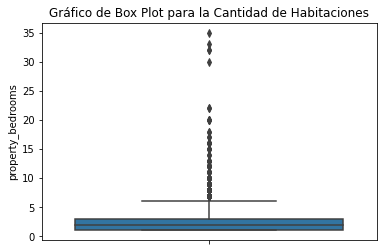

In [592]:
sns.boxplot(y=df.property_bedrooms)
plt.title("Gráfico de Box Plot para la Cantidad de Habitaciones")
plt.show()

Veamos cuántos valores atípicos restan según el análisis en cuestión:

In [593]:
df[df.property_bedrooms > out_sup].shape[0]

225

##### Variable `property_surface_total`

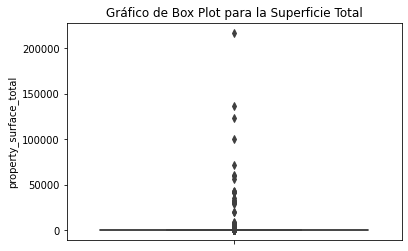

In [594]:
sns.boxplot(y=df.property_surface_total)
plt.title("Gráfico de Box Plot para la Superficie Total")
plt.show()

In [595]:
print(f"Medidas para Superficie Total:")

df_c = df.property_surface_total

Q1 = df_c.describe().get("25%")
Q3 = df_c.describe().get("75%")

print(f"El valor de Q1 es: {Q1}")
print(f"El valor de Q3 es: {Q3}")

IQR = Q3 - Q1

out_inf = Q1 - 1.5 * IQR
out_sup = Q3 + 1.5 * IQR

print(f"El limite inferior del Q1 es: {out_inf}")
print(f"El limite superior del Q3 es: {out_sup}")

Medidas para Superficie Total:
El valor de Q1 es: 45.0
El valor de Q3 es: 105.0
El limite inferior del Q1 es: -45.0
El limite superior del Q3 es: 195.0


De analizar el gráfico, podríamos pensar que los valores por encima del límite superior del box plot realmente pertenecerían a valores atípicos de la variable, ya que es extraño que un Departamento/Casa/PH tenga una superficie mayor a 20.000 m2. En esta línea, estudiemos dichos registros:

In [596]:
df[df.property_surface_total > 19500].head(5)

start_date  end_date  created_on    latitud   longitud      place_l4  \
370917      737904    737946      737904 -34.571747 -58.422612       Palermo   
352883      737966    737979      737966 -34.550093 -58.483034      Saavedra   
72316       737939    737949      737939 -34.578917 -58.429373       Palermo   
372779      738026    738036      738026 -34.555278 -58.459786      Belgrano   
106598      737860    737900      737860 -34.587320 -58.401556  Barrio Norte   

       property_type  property_rooms  property_bedrooms  \
370917  Departamento             4.0                3.0   
352883  Departamento             1.0                1.0   
72316   Departamento             2.0                1.0   
372779  Departamento             4.0                3.0   
106598  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  
370917                 42110.0                     222.0       1910920.0  
352883                 29064.0                   29064.0         87400.0  
72316                  61130.0                   53030.0        225000.0  
372779                100068.0                  100051.0        420000.0  
106598                 56740.0                   52540.0        175000.0

Veamos qué porcentaje representan dichos datos sobre el total:

In [597]:
pct = df[df.property_surface_total > 19500].shape[0] / df.property_surface_total.shape[0] * 100
print(f"Las propiedades en venta con una superficie total mayor a 19.500 m2 representan un {round(pct,3)}% del total.")

Las propiedades en venta con una superficie total mayor a 19.500 m2 representan un 0.033% del total.


Dado que los valores atípicos detectados representan un índice bajo sobre el total de datos, procedemos a eliminarlos del dataset:

In [598]:
df.drop(df[df.property_surface_total > 19500].index, inplace=True)

Replicamos para el dataset de test:

In [599]:
test.drop(test[test.property_surface_total > 19500].index, inplace=True)

Nuevamente, realizamos el gráfico de Box Plot:

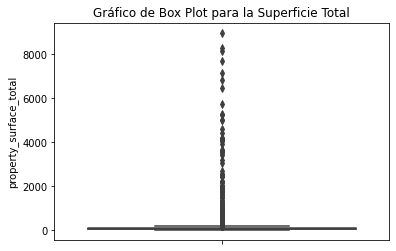

In [600]:
sns.boxplot(y=df.property_surface_total)
plt.title("Gráfico de Box Plot para la Superficie Total")
plt.show()

Veamos cuántos valores atípicos restan según el análisis en cuestión:

In [601]:
df[df.property_surface_total > out_sup].shape[0]

6295

##### Variable `property_surface_covered`

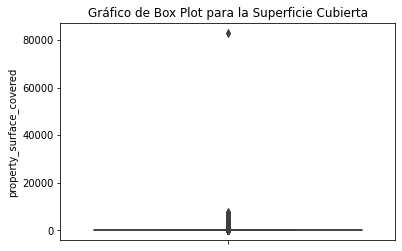

In [602]:
sns.boxplot(y=df.property_surface_covered)
plt.title("Gráfico de Box Plot para la Superficie Cubierta")
plt.show()

In [603]:
print(f"Medidas para Superficie Cubierta:")

df_c = df.property_surface_covered

Q1 = df_c.describe().get("25%")
Q3 = df_c.describe().get("75%")

print(f"El valor de Q1 es: {Q1}")
print(f"El valor de Q3 es: {Q3}")

IQR = Q3 - Q1

out_inf = Q1 - 1.5 * IQR
out_sup = Q3 + 1.5 * IQR

print(f"El limite inferior del Q1 es: {out_inf}")
print(f"El limite superior del Q3 es: {out_sup}")

Medidas para Superficie Cubierta:
El valor de Q1 es: 40.0
El valor de Q3 es: 89.0
El limite inferior del Q1 es: -33.5
El limite superior del Q3 es: 162.5


Nuevamente, visualizamos una masa de observaciones detectada como valores atípicos cercanas al límite superior del Box Plot y una única observación lejana. Estudiamos la misma:

In [604]:
df[df.property_surface_covered > 80000]

start_date  end_date  created_on    latitud   longitud      place_l4  \
199905      737996    738417      737996 -34.604362 -58.392366  Barrio Norte   

       property_type  property_rooms  property_bedrooms  \
199905  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  
199905                    83.0                   83000.0        155000.0

Procedemos a eliminar dicha observación puesto que corresponde en su totalidad a un valor atípico:

In [605]:
df.drop(df[df.property_surface_covered > 80000].index, inplace=True)

Replicamos para el dataset de test:

In [606]:
test.drop(test[test.property_surface_covered > 80000].index, inplace=True)

Nuevamente, realizamos el gráfico de Box Plot:

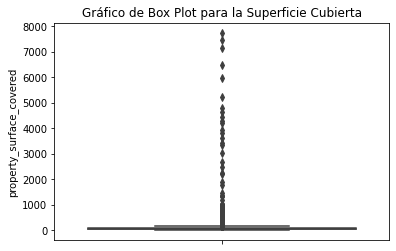

In [607]:
sns.boxplot(y=df.property_surface_covered)
plt.title("Gráfico de Box Plot para la Superficie Cubierta")
plt.show()

Veamos cuántos valores atípicos restan según el análisis en cuestión:

In [608]:
df[df.property_surface_covered > out_sup].shape[0]

6347

#### Técnica Z Score

Para seguir con el análisis, evaluamos si las variables cumplen con la regla de oro |Z| > 3. Tomamos la convención de eliminar del dataset todos los valores detectados como atípicos, según el método, que representen un porcentaje menor al 1% del total de datos ya que decidimos que este porcentaje de datos eliminados no representará un fuerte impacto en el conjunto de datos resultante.

##### Variable `start_date`

In [609]:
z_score = (df.start_date - np.mean(df.start_date)) / np.std(df.start_date)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Como notamos anteriormente, no se observan registros de valores atípicos dentro de esta variable.

##### Variable `end_date`

In [610]:
z_score = (df.end_date - np.mean(df.end_date)) / np.std(df.end_date)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Confirmamos nuevamente que para end_date no se registran valores atípicos.

##### Variable `created_on`

In [611]:
z_score = (df.created_on - np.mean(df.created_on)) / np.std(df.created_on)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Concluimos que `created_on` tampoco presenta observaciones atípicas.

##### Variable `latitud`

In [612]:
z_score = (df.latitud - np.mean(df.latitud)) / np.std(df.latitud)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 291 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 10 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [613]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.385% del total de los datos.


In [614]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.013% del total de los datos.


Dado que las observaciones identificadas como outliers según el método de Z Score representan una ínfima porción del set de datos, procedemos a eliminar dichos valores:

In [615]:
df.drop(df[z_score > 3].index, inplace=True)

In [616]:
df.drop(df[z_score < -3].index, inplace=True)

Replicamos para el dataset de test, estandarizando según la media y el desvío del dataset de train:

In [617]:
z_score_test = (test.latitud - np.mean(df.latitud)) / np.std(df.latitud)

In [618]:
test.drop(test[z_score_test > 3].index, inplace=True)

In [619]:
test.drop(test[z_score_test < -3].index, inplace=True)

##### Variable `longitud`

In [620]:
z_score = (df.longitud - np.mean(df.longitud)) / np.std(df.longitud)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 3 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [621]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.0% del total de los datos.


In [622]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.004% del total de los datos.


Nuevamente, dado al bajo porcentaje que representan los valores atípicos detectados sobre el total de datos, procedemos a eliminarlos:

In [623]:
df.drop(df[z_score > 3].index, inplace=True)

In [624]:
df.drop(df[z_score < -3].index, inplace=True)

Replicamos para el dataset de test, estandarizando según la media y el desvío del dataset de train:

In [625]:
z_score_test = (test.longitud - np.mean(df.longitud)) / np.std(df.longitud)

In [626]:
test.drop(test[z_score_test > 3].index, inplace=True)

In [627]:
test.drop(test[z_score_test < -3].index, inplace=True)

##### Variable `property_rooms`

In [628]:
z_score = (df.property_rooms - np.mean(df.property_rooms)) / np.std(df.property_rooms)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 626 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [629]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.831% del total de los datos.


In [630]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Nuevamente, dado al bajo porcentaje que representan los valores atípicos detectados sobre el total de datos, procedemos a eliminarlos:

In [631]:
df.drop(df[z_score > 3].index, inplace=True)

In [632]:
df.drop(df[z_score < -3].index, inplace=True)

Replicamos para el dataset de test, estandarizando según la media y el desvío del dataset de train:

In [633]:
z_score_test = (test.property_rooms - np.mean(df.property_rooms)) / np.std(df.property_rooms)

In [634]:
test.drop(test[z_score_test > 3].index, inplace=True)

In [635]:
test.drop(test[z_score_test < -3].index, inplace=True)

##### Variable `property_bedrooms`

In [636]:
z_score = (df.property_bedrooms - np.mean(df.property_bedrooms)) / np.std(df.property_bedrooms)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 785 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [637]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 1.051% del total de los datos.


In [638]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Notemos que, respecto de las variables que venimos estudiando en la sección actual, es alta la cantidad de valores atípicos detectados por la técnica de Z Score para la variable `property_bedrooms`. En esta línea, estudiamos en detalle los outliers encontrados:

In [639]:
sorted(df[z_score > 3].property_bedrooms.unique())

[5.0, 6.0, 7.0, 8.0, 11.0, 20.0, 22.0, 30.0, 32.0]

A pesar de que nos resulta extraño que existan propiedades con una cantidad de habitaciones mayor a 20, es importante destacar nuevamente que sería más certero consolidar un conclusión luego de un análisis multivariado para esta variable puesto a la alta relevancia que tiene el tipo de propiedad sobre la misma.
En esta línea, no eliminaremos las observaciones que se alejen 3 desvíos de la media.

##### Variable `property_surface_total`

In [640]:
z_score = (df.property_surface_total - np.mean(df.property_surface_total)) / np.std(df.property_surface_total)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 394 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [641]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.528% del total de los datos.


In [642]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Nuevamente, dado al bajo porcentaje que representan los valores atípicos detectados sobre el total de datos, procedemos a eliminarlos:

In [643]:
df.drop(df[z_score > 3].index, inplace=True)

In [644]:
df.drop(df[z_score < -3].index, inplace=True)

Replicamos para el dataset de test, estandarizando según la media y el desvío del dataset de train:

In [645]:
z_score_test = (test.property_surface_total - np.mean(df.property_surface_total)) / np.std(df.property_surface_total)

In [646]:
test.drop(test[z_score_test > 3].index, inplace=True)

In [647]:
test.drop(test[z_score_test < -3].index, inplace=True)

##### Variable `property_surface_covered`

In [648]:
z_score = (df.property_surface_covered - np.mean(df.property_surface_covered)) / np.std(df.property_surface_covered)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 1544 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [649]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 2.078% del total de los datos.


In [650]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Debido al alto porcentaje de datos detectados como valores atípicos, decidimos no eliminar los mismos del dataset.

#### Técnica Z Score Modificado

Finalmente, evaluamos si las variables cumplen con la regla de oro |Z| > 3,5. Nuevamente estaremos utilizando la convención de eliminar aquellos valores detectados como atípicos que no representen más del 1% del total de los datos.

Puesto que con ninguno de los dos metodos anteriores no se registraron valores atípicos tanto para `start_date`, `end_date` y `created_on`, se omitiran del proximo análisis.

##### Variable `latitud`

In [651]:
z_score_m = (df.latitud - np.median(df.latitud))*0.6745 / np.median(np.absolute(df.latitud - np.median(df.latitud)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 5 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [652]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 0.0% del total de los datos.


In [653]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.007% del total de los datos.


Dado que las observaciones identificadas como outliers según el método de Z Score representan una ínfima porción del set de datos, procedemos a eliminar dichos valores:

In [654]:
df.drop(df[z_score_m > 3.5].index, inplace=True)

In [655]:
df.drop(df[z_score_m < -3.5].index, inplace=True)

Replicamos para el dataset de test, estandarizando según la media y el desvío del dataset de train:

In [656]:
z_score_m_test = (test.latitud - np.median(df.latitud))*0.6745 / np.median(np.absolute(df.latitud - np.median(df.latitud)))

In [657]:
test.drop(test[z_score_m_test > 3.5].index, inplace=True)

In [658]:
test.drop(test[z_score_m_test < -3.5].index, inplace=True)

##### Variable `longitud`

In [659]:
z_score_m = (df.longitud - np.median(df.longitud))*0.6745 / np.median(np.absolute(df.longitud - np.median(df.longitud)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


No existen outliers a eliminar en el dataset de trabajo según el método en cuestión.

Ahora bien, como no podemos asegurar que la regla de oro de Z Score Modificado se cumpla para el dataset de test, eliminamos si es que hubiesen registros:

In [660]:
z_score_m_test = (test.longitud - np.median(df.longitud))*0.6745 / np.median(np.absolute(df.longitud - np.median(df.longitud)))

In [661]:
test.drop(test[z_score_m_test > 3.5].index, inplace=True)

In [662]:
test.drop(test[z_score_m_test < -3.5].index, inplace=True)

##### Variable `property_rooms`

In [663]:
z_score_m = (df.property_rooms - np.median(df.property_rooms))*0.6745 / np.median(np.absolute(df.property_rooms - np.median(df.property_rooms)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


No existen outliers a eliminar en el dataset de trabajo según el método en cuestión.

Nuevamente procedemos a eliminar los outliers detectados en el dataset de test a pesar de no haberlo hecho para el de trabajo -pueso que nos habíamos asegurado que no existían-:

In [664]:
z_score_m_test = (test.property_rooms - np.median(df.property_rooms))*0.6745 / np.median(np.absolute(df.property_rooms - np.median(df.property_rooms)))

In [665]:
test.drop(test[z_score_m_test > 3.5].index, inplace=True)

In [666]:
test.drop(test[z_score_m_test < -3.5].index, inplace=True)

##### Variable `property_bedrooms`

In [667]:
z_score_m = (df.property_bedrooms - np.median(df.property_bedrooms))*0.6745 / np.median(np.absolute(df.property_bedrooms - np.median(df.property_bedrooms)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 13 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [668]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 0.017% del total de los datos.


In [669]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Dado que las observaciones identificadas como outliers según el método de Z Score representan una ínfima porción del set de datos, procedemos a eliminar dichos valores:

In [670]:
df.drop(df[z_score_m > 3.5].index, inplace=True)

In [671]:
df.drop(df[z_score_m < -3.5].index, inplace=True)

Replicamos para el dataset de test, estandarizando según la media y el desvío del dataset de train:

In [672]:
z_score_m_test = (test.property_bedrooms - np.median(df.property_bedrooms))*0.6745 / np.median(np.absolute(df.property_bedrooms - np.median(df.property_bedrooms)))

In [673]:
test.drop(test[z_score_m_test > 3.5].index, inplace=True)

In [674]:
test.drop(test[z_score_m_test < -3.5].index, inplace=True)

##### Variable `property_surface_total`

In [675]:
z_score_m = (df.property_surface_total - np.median(df.property_surface_total))*0.6745 / np.median(np.absolute(df.property_surface_total - np.median(df.property_surface_total)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 5652 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [676]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 7.61% del total de los datos.


In [677]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Debido al alto porcentaje de datos detectados como valores atípicos, decidimos no eliminar los mismos del dataset.

##### Variable `property_surface_covered`

In [678]:
z_score_m = (df.property_surface_covered - np.median(df.property_surface_covered))*0.6745 / np.median(np.absolute(df.property_surface_covered - np.median(df.property_surface_covered)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 5434 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [679]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 7.316% del total de los datos.


In [680]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Debido al alto porcentaje de datos detectados como valores atípicos, decidimos no eliminar los mismos del dataset.

### Análisis Multivariado

---

##### Técnica Box Plot - Tipo de Propiedad

A continuación estaremos realizando un análisis multivariado de las variables numéricas del dataset de acuerdo al tipo de propiedad al cual corresponda cada una.

Separo los datasets para utilizar en el estudio:

In [681]:
df_depto = df[df.property_type == 'Departamento']
df_casa = df[df.property_type == 'Casa']
df_ph = df[df.property_type == 'PH']

###### Variable `property_rooms`

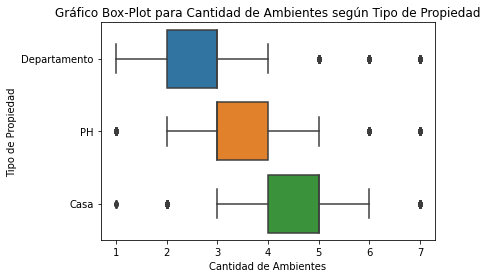

In [682]:
sns.boxplot(data=df, x="property_rooms", y="property_type")
plt.title('Gráfico Box-Plot para Cantidad de Ambientes según Tipo de Propiedad')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Tipo de Propiedad')
plt.show()

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

In [683]:
print(f"Medidas para Cantidad de Ambientes para Departamento:")

print_box_plot_medidas(df_depto.property_rooms)

Medidas para Cantidad de Ambientes para Departamento:
El valor de Q1 es: 2.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: 0.5
El limite superior del Q3 es: 4.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [701]:
df_depto[df_depto.property_rooms > 4.5].head(5)

start_date  end_date  created_on    latitud   longitud      place_l4  \
155779      737885    737895      737885 -34.566853 -58.446764      Belgrano   
204264      737920    737946      737920 -34.598455 -58.403754  Barrio Norte   
302892      738028    738083      738028 -34.613984 -58.391485      Belgrano   
145697      738032    738062      738032 -34.573079 -58.419203       Palermo   
257091      738097    738188      738097 -34.596154 -58.395994      Recoleta   

       property_type  property_rooms  property_bedrooms  \
155779  Departamento             5.0                4.0   
204264  Departamento             5.0                3.0   
302892  Departamento             6.0                4.0   
145697  Departamento             6.0                3.0   
257091  Departamento             7.0                4.0   

        property_surface_total  property_surface_covered  property_price  
155779                   380.0                     380.0       1300000.0  
204264                   203.0                     203.0        520000.0  
302892                   390.0                     390.0       1290000.0  
145697                   400.0                     400.0       2100000.0  
257091                   228.0                     228.0        600000.0

Analicemos qué porcentaje representan sobre el total de datos:

In [705]:
pct = df_depto[df_depto.property_rooms > 4.5].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 5.607% de los datos.


Debido al alto porcentaje de datos que representan, decidimos postergar la decisión del tratamiento de los mismos mediante un método que nos permita estudiar qué tipo de relación tiene la variable `property_rooms` con otras que puedan llegar a dar más información respecto al espacio disponible en la propiedad, como pueden ser `property_surface_total` o `property_surface_covered`.

In [686]:
print(f"Medidas para Cantidad de Ambientes para Casa:")

print_box_plot_medidas(df_casa.property_rooms)

Medidas para Cantidad de Ambientes para Casa:
El valor de Q1 es: 4.0
El valor de Q3 es: 5.0
El limite inferior del Q1 es: 2.5
El limite superior del Q3 es: 6.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [706]:
df_casa[df_casa.property_rooms > 6.5].head(5)

start_date  end_date  created_on    latitud   longitud  \
90822       738005    738246      738005 -34.640264 -58.489327   
88587       737924    737946      737924 -34.604677 -58.463811   
48400       738017    738195      738017 -34.656564 -58.482585   
412684      738051    738051      738051 -34.605957 -58.516032   
148693      737922    737959      737922 -34.600994 -58.483803   

                place_l4 property_type  property_rooms  property_bedrooms  \
90822         Villa Luro          Casa             7.0                5.0   
88587           Paternal          Casa             7.0                6.0   
48400          Mataderos          Casa             7.0                5.0   
412684      Villa Devoto          Casa             7.0                3.0   
148693  Villa del Parque          Casa             7.0                5.0   

        property_surface_total  property_surface_covered  property_price  
90822                    457.0                     457.0        549900.0  
88587                    209.0                     140.0        299500.0  
48400                    321.0                     230.0        229000.0  
412684                   400.0                     300.0        660000.0  
148693                   250.0                     180.0        290000.0

Analicemos qué porcentaje representan sobre el total de datos:

In [709]:
pct = df_casa[df_casa.property_rooms > 6.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 6.284% de los datos.


Veamos los valores atípicos que superan el límite inferior del primer cuartil:

In [708]:
df_casa[df_casa.property_rooms < 2.5].head(5)

start_date  end_date  created_on    latitud   longitud  \
71018       737800    737911      737800 -34.582937 -58.429531   
228667      737857    737946      737857 -34.602056 -58.378125   
159026      738107    738417      738107 -34.629550 -58.494687   
4354        738053    738223      738053 -34.574590 -58.440812   
433273      737914    737967      737914 -34.635611 -58.390792   

                place_l4 property_type  property_rooms  property_bedrooms  \
71018            Palermo          Casa             2.0                1.0   
228667       San Nicolás          Casa             2.0                1.0   
159026          Floresta          Casa             2.0                1.0   
4354            Belgrano          Casa             1.0                1.0   
433273  Parque Patricios          Casa             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  
71018                     99.0                      99.0        280000.0  
228667                    28.0                      28.0         70000.0  
159026                    64.0                      64.0         89000.0  
4354                      36.0                      36.0         83000.0  
433273                    44.0                      44.0         58000.0

Analicemos qué porcentaje representan sobre el total de datos:

In [710]:
pct = df_casa[df_casa.property_rooms < 2.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 1.526% de los datos.


Nuevamente, debido al alto porcentaje que representan los outliers sobre el set de datos postergamos su tratamiento para comparar la variable con `property_surface_total` y `property_surface_covered`.

In [689]:
print(f"Medidas para Cantidad de Ambientes para PH:")

print_box_plot_medidas(df_ph.property_rooms)

Medidas para Cantidad de Ambientes para PH:
El valor de Q1 es: 3.0
El valor de Q3 es: 4.0
El limite inferior del Q1 es: 1.5
El limite superior del Q3 es: 5.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [690]:
df_ph[df_ph.property_rooms > 5.5].head(5)

start_date  end_date  created_on    latitud   longitud       place_l4  \
241652      737881    737965      737881 -34.564779 -58.505463  Villa Urquiza   
442754      737917    737946      737917 -34.584556 -58.451046     Colegiales   
337369      737893    737946      737893 -34.646242 -58.419297        Pompeya   
100116      737887    737946      737887 -34.582252 -58.440624        Palermo   
253214      738022    738121      738022 -34.608322 -58.457455      Caballito   

       property_type  property_rooms  property_bedrooms  \
241652            PH             6.0                3.0   
442754            PH             6.0                3.0   
337369            PH             6.0                3.0   
100116            PH             7.0                4.0   
253214            PH             6.0                3.0   

        property_surface_total  property_surface_covered  property_price  
241652                   184.0                     124.0        350000.0  
442754                   126.0                     126.0        395000.0  
337369                   198.0                     128.0        230000.0  
100116                   292.0                     187.0        515000.0  
253214                   200.0                     174.0        249999.0

Analicemos qué porcentaje representan sobre el total de datos:

In [691]:
pct = df_ph[df_ph.property_rooms > 5.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 4.086% de los datos.


Veamos los valores atípicos que superan el límite inferior del primer cuartil:

In [711]:
df_ph[df_ph.property_rooms < 1.5].head(5)

start_date  end_date  created_on    latitud   longitud  \
14184       738002    738321      738002 -34.616171 -58.522002   
3028        737841    737850      737841 -34.640603 -58.417313   
386722      737879    738195      737879 -34.604566 -58.454447   
75907       737988    738061      737988 -34.618308 -58.486056   
299255      737808    737904      737808 -34.576793 -58.507122   

                place_l4 property_type  property_rooms  property_bedrooms  \
14184       Villa Devoto            PH             1.0                1.0   
3028             Pompeya            PH             1.0                2.0   
386722      Villa Crespo            PH             1.0                1.0   
75907   Villa del Parque            PH             1.0                1.0   
299255  Villa Pueyrredón            PH             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  
14184                     35.0                      35.0         62000.0  
3028                      27.0                      22.0         53000.0  
386722                    31.0                      31.0         52000.0  
75907                     42.0                      32.0         60000.0  
299255                    30.0                      30.0         69900.0

Analicemos qué porcentaje representan sobre el total de datos:

In [712]:
pct = df_ph[df_ph.property_rooms < 1.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 2.015% de los datos.


Nuevamente, postergamos el tratamiento de los outliers para comparar la variable con `property_surface_total` y `property_surface_covered`.

###### Variable `property_bedrooms`

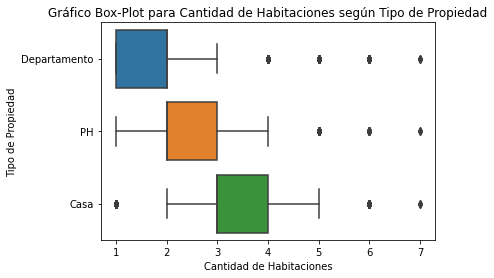

In [713]:
sns.boxplot(data=df, x="property_bedrooms", y="property_type")
plt.title('Gráfico Box-Plot para Cantidad de Habitaciones según Tipo de Propiedad')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Tipo de Propiedad')
plt.show()

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

In [714]:
print(f"Medidas para Cantidad de Habitaciones para Departamento:")

print_box_plot_medidas(df_depto.property_bedrooms)

Medidas para Cantidad de Habitaciones para Departamento:
El valor de Q1 es: 1.0
El valor de Q3 es: 2.0
El limite inferior del Q1 es: -0.5
El limite superior del Q3 es: 3.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [715]:
df_depto[df_depto.property_bedrooms > 3.5].head(5)

start_date  end_date  created_on    latitud   longitud  \
155779      737885    737895      737885 -34.566853 -58.446764   
302892      738028    738083      738028 -34.613984 -58.391485   
257091      738097    738188      738097 -34.596154 -58.395994   
104186      737938    737959      737938 -34.609749 -58.441302   
196406      737997    738366      737997 -34.562379 -58.454491   

                 place_l4 property_type  property_rooms  property_bedrooms  \
155779           Belgrano  Departamento             5.0                4.0   
302892           Belgrano  Departamento             6.0                4.0   
257091           Recoleta  Departamento             7.0                4.0   
104186  Parque Centenario  Departamento             5.0                4.0   
196406           Belgrano  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  
155779                   380.0                     380.0       1300000.0  
302892                   390.0                     390.0       1290000.0  
257091                   228.0                     228.0        600000.0  
104186                   211.0                     170.0        380000.0  
196406                   307.0                     307.0       1190000.0

Analicemos qué porcentaje representan sobre el total de datos:

In [716]:
pct = df_depto[df_depto.property_bedrooms > 3.5].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 3.891% de los datos.


Siguiendo con el razonamiento realizado para el tratamiento de la variable `property_rooms`, postergamos el análisis de los outliers detectados para visualizar cómo se comporta la misma en relación a variables de superficie.

In [717]:
print(f"Medidas para Cantidad de Habitaciones para Casa:")

print_box_plot_medidas(df_casa.property_bedrooms)

Medidas para Cantidad de Habitaciones para Casa:
El valor de Q1 es: 3.0
El valor de Q3 es: 4.0
El limite inferior del Q1 es: 1.5
El limite superior del Q3 es: 5.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [720]:
df_casa[df_casa.property_bedrooms > 5.5].head(5)

start_date  end_date  created_on    latitud   longitud  \
88587       737924    737946      737924 -34.604677 -58.463811   
443155      737917    737946      737917 -34.626725 -58.394309   
184513      737947    738106      737947 -34.639012 -58.389229   
225287      738047    738182      738047 -34.651411 -58.473591   
431249      738140    738195      738140 -34.583300 -58.466428   

                 place_l4 property_type  property_rooms  property_bedrooms  \
88587            Paternal          Casa             7.0                6.0   
443155      San Cristobal          Casa             6.0                6.0   
184513           Barracas          Casa             7.0                6.0   
225287  Parque Avellaneda          Casa             7.0                6.0   
431249      Villa Ortuzar          Casa             6.0                6.0   

        property_surface_total  property_surface_covered  property_price  
88587                    209.0                     140.0        299500.0  
443155                   320.0                     320.0        240000.0  
184513                   244.0                     202.0        200000.0  
225287                   257.0                     257.0        270000.0  
431249                   190.0                     160.0        600000.0

Analicemos qué porcentaje representan sobre el total de datos:

In [721]:
pct = df_casa[df_casa.property_bedrooms > 5.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 1.744% de los datos.


Veamos los valores atípicos que superan el límite inferior del primer cuartil:

In [722]:
df_casa[df_casa.property_bedrooms < 1.5].head(5)

start_date  end_date  created_on    latitud   longitud     place_l4  \
51062       737964    737989      737964 -34.669111 -58.505888    Mataderos   
71018       737800    737911      737800 -34.582937 -58.429531      Palermo   
228667      737857    737946      737857 -34.602056 -58.378125  San Nicolás   
159026      738107    738417      738107 -34.629550 -58.494687     Floresta   
362533      737806    737946      737806 -34.558882 -58.486122     Saavedra   

       property_type  property_rooms  property_bedrooms  \
51062           Casa             3.0                1.0   
71018           Casa             2.0                1.0   
228667          Casa             2.0                1.0   
159026          Casa             2.0                1.0   
362533          Casa             3.0                1.0   

        property_surface_total  property_surface_covered  property_price  
51062                    165.0                      95.0         79900.0  
71018                     99.0                      99.0        280000.0  
228667                    28.0                      28.0         70000.0  
159026                    64.0                      64.0         89000.0  
362533                   179.0                     113.0        250000.0

Analicemos qué porcentaje representan sobre el total de datos:

In [723]:
pct = df_casa[df_casa.property_bedrooms < 1.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 2.07% de los datos.


Nuevamente postergamos el análisis.

In [724]:
print(f"Medidas para Cantidad de Habitaciones para PH:")

print_box_plot_medidas(df_ph.property_bedrooms)

Medidas para Cantidad de Habitaciones para PH:
El valor de Q1 es: 2.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: 0.5
El limite superior del Q3 es: 4.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [725]:
df_ph[df_ph.property_bedrooms > 4.5].head(5)

start_date  end_date  created_on    latitud   longitud  \
389100      737915    737922      737915 -34.631387 -58.429794   
276056      738147    738182      738147 -34.583964 -58.463418   
297303      737953    737957      737953 -34.582828 -58.423662   
412617      738051    738223      738051 -34.600763 -58.401079   
330421      737805    737912      737805 -34.605683 -58.408354   

                place_l4 property_type  property_rooms  property_bedrooms  \
389100  Parque Chacabuco            PH             6.0                5.0   
276056     Villa Ortuzar            PH             6.0                5.0   
297303           Palermo            PH             6.0                5.0   
412617      Barrio Norte            PH             7.0                6.0   
330421           Almagro            PH             5.0                5.0   

        property_surface_total  property_surface_covered  property_price  
389100                   246.0                     159.0        225000.0  
276056                   288.0                     224.0        249000.0  
297303                    87.0                      87.0        235000.0  
412617                   260.0                     260.0        320000.0  
330421                   116.0                     116.0        177000.0

Analicemos qué porcentaje representan sobre el total de datos:

In [726]:
pct = df_ph[df_ph.property_bedrooms > 4.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 1.7% de los datos.


Nuevamente, postergamos el análisis.

###### Variable `property_surface_total`

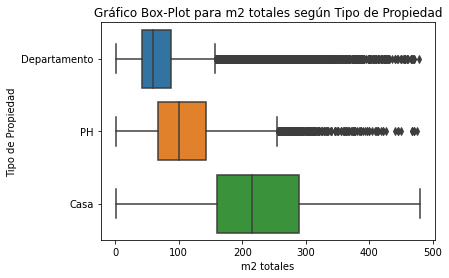

In [728]:
sns.boxplot(data=df, x="property_surface_total", y="property_type")
plt.title('Gráfico Box-Plot para m2 totales según Tipo de Propiedad')
plt.xlabel('m2 totales')
plt.ylabel('Tipo de Propiedad')
plt.show()

Como se puede apreciar, en la variable property_surface_total tenemos una muy alta cantidad de valores que sobrepasan el límite superior del tercer cuartil, tanto para el tipo de propiedad Departamento, como para PH.

In [729]:
print(f"Medidas para m2 totales para Departamento:")

print_box_plot_medidas(df_depto.property_surface_total)

Medidas para m2 totales para Departamento:
El valor de Q1 es: 42.0
El valor de Q3 es: 88.0
El limite inferior del Q1 es: -27.0
El limite superior del Q3 es: 157.0


In [730]:
print(f"Medidas para m2 totales para Casa:")

print_box_plot_medidas(df_casa.property_surface_total)

Medidas para m2 totales para Casa:
El valor de Q1 es: 161.0
El valor de Q3 es: 290.0
El limite inferior del Q1 es: -32.5
El limite superior del Q3 es: 483.5


In [731]:
print(f"Medidas para m2 totales para PH:")

print_box_plot_medidas(df_ph.property_surface_total)

Medidas para m2 totales para PH:
El valor de Q1 es: 68.0
El valor de Q3 es: 143.0
El limite inferior del Q1 es: -44.5
El limite superior del Q3 es: 255.5


Si bien se ve claramente una gran masa de valores que no son esperados debido a que se encuentran una vez mas por encima del limite, teniendo en cuenta la tan fuerte presencia de estos, consideramos que el metodo utilizado en este analisis no es suficiente para poder llegar a una caracterizacion solida. No podemos afirmar que todos estos valores son atipicos. 

Puntualmente en esta variable vemos muy importante el realizar un estudio mas exhaustivo utilizando otro metodo y variable a correlacionar.

Una vez mas se puede apreciar la importancia de subdividir de acuerdo con el tipo de propiedad, ya que las medidas obtenidas para cada uno de estos son notablemente diferentes.

###### Variable `property_surface_covered`

A continuacion estudiaremos el grafico de Box-Plot para la ultima variable a analizar.

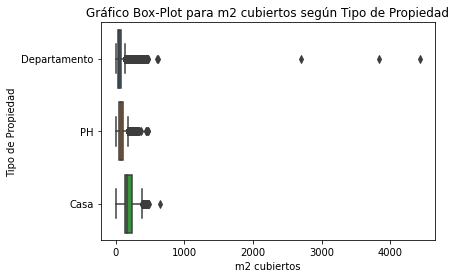

In [732]:
sns.boxplot(data=df, x="property_surface_covered", y="property_type")
plt.title('Gráfico Box-Plot para m2 cubiertos según Tipo de Propiedad')
plt.xlabel('m2 cubiertos')
plt.ylabel('Tipo de Propiedad')
plt.show()

In [736]:
print(f"Medidas para m2 cubiertos para Departamento:")

print_box_plot_medidas(df_depto.property_surface_covered)

Medidas para m2 cubiertos para Departamento:
El valor de Q1 es: 39.0
El valor de Q3 es: 79.0
El limite inferior del Q1 es: -21.0
El limite superior del Q3 es: 139.0


In [737]:
print(f"Medidas para m2 cubiertos para Casa:")

print_box_plot_medidas(df_casa.property_surface_covered)

Medidas para m2 cubiertos para Casa:
El valor de Q1 es: 128.0
El valor de Q3 es: 230.0
El limite inferior del Q1 es: -25.0
El limite superior del Q3 es: 383.0


In [738]:
print(f"Medidas para m2 cubiertos para PH:")

print_box_plot_medidas(df_ph.property_surface_covered)

Medidas para m2 cubiertos para PH:
El valor de Q1 es: 55.0
El valor de Q3 es: 104.0
El limite inferior del Q1 es: -18.5
El limite superior del Q3 es: 177.5


A diferencia de los graficos previos, en esta variable en particular se puede apreciar tres valores puntualmente alejados del resto de la masa.

In [739]:
df_depto[df_depto.property_surface_covered > 1000]

start_date  end_date  created_on    latitud   longitud  \
30359       738078    738182      738078 -34.620935 -58.374850   
438160      738090    738159      738090 -34.630704 -58.400901   
354376      738098    738182      738098 -34.579394 -58.453519   

                place_l4 property_type  property_rooms  property_bedrooms  \
30359          San Telmo  Departamento             2.0                1.0   
438160  Parque Patricios  Departamento             1.0                1.0   
354376        Colegiales  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  
30359                     48.0                    4435.0         93500.0  
438160                    31.0                    2700.0         71500.0  
354376                    41.0                    3837.0         83000.0

Determinamos esta como una razon suficiente para eliminarlos del dataset, y procedemos a corregirlo en nuestro dataset de train, replicando los ajustes en test.

In [740]:
df_depto.drop(df[df.property_surface_covered > 1000].index, inplace=True)
df.drop(df.loc[(df.property_surface_covered > 1000) & (df.property_type == 'Departamento')].index, inplace=True)
test.drop(test.loc[(test.property_surface_covered > 1000) & (test.property_type == 'Departamento')].index, inplace=True)

Validamos que se hayan aplicado los cambios.

In [741]:
df.loc[(df.property_surface_covered > 1000) & (df.property_type == 'Departamento')]

Empty DataFrame
Columns: [start_date, end_date, created_on, latitud, longitud, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [742]:
test.loc[(test.property_surface_covered > 1000) & (test.property_type == 'Departamento')]

Empty DataFrame
Columns: [start_date, end_date, created_on, latitud, longitud, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

A continuacion volveremos a hacer un analisis sobre el grafico Box-Plot para estudiar como cambio su comportamiento

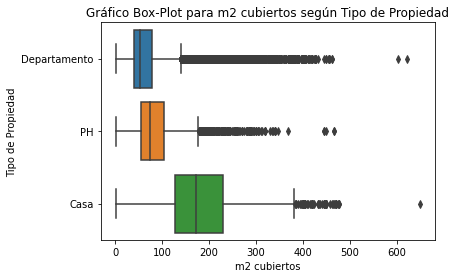

In [743]:
sns.boxplot(data=df, x="property_surface_covered", y="property_type")
plt.title('Gráfico Box-Plot para m2 cubiertos según Tipo de Propiedad')
plt.xlabel('m2 cubiertos')
plt.ylabel('Tipo de Propiedad')
plt.show()

Las medidas obtenidas fueron las siguientes:

In [744]:
print(f"Medidas para m2 cubiertos para Departamento:")

print_box_plot_medidas(df_depto.property_surface_covered)

Medidas para m2 cubiertos para Departamento:
El valor de Q1 es: 39.0
El valor de Q3 es: 79.0
El limite inferior del Q1 es: -21.0
El limite superior del Q3 es: 139.0


In [745]:
print(f"Medidas para m2 cubiertos para Casa:")

print_box_plot_medidas(df_casa.property_surface_covered)

Medidas para m2 cubiertos para Casa:
El valor de Q1 es: 128.0
El valor de Q3 es: 230.0
El limite inferior del Q1 es: -25.0
El limite superior del Q3 es: 383.0


In [746]:
print(f"Medidas para m2 cubiertos para PH:")

print_box_plot_medidas(df_ph.property_surface_covered)

Medidas para m2 cubiertos para PH:
El valor de Q1 es: 55.0
El valor de Q3 es: 104.0
El limite inferior del Q1 es: -18.5
El limite superior del Q3 es: 177.5


Como era de esperarse, obtuvimos registros mayores al limite superior en cada uno de los casos. Si bien nuevamente contamos con algunos valores que estan definidamente separados de los demas, esta vez no resultan alejados por una distancia tan significativa como los anteriores.

Los notamos como posibles candidatos a ser outliers, para confirmar luego de un analisis mas profundo.

##### Técnica Scatter

todo

##### Técnica Mahalanobis

todo

### Outliers multivariados

---

Para el análisis de outliers de tipo multivariados estaremos utilizando el método de Mahalanobis el cual nos brinda información respecto de la distancia de las observaciones agrupando las similares en clusters, evidenciando así los puntos aislados que pasaremos a considerar como valores atípicos.

Por último, podremos destacar cuáles son las características de los valores en cuestión pudiendo clasificar los mismos en: global, contextual y colectivo.

In [ ]:
mahal = df.copy()

#### Property surface total vs Price



##### Scatter


En un primer lugar lo que vamos a hacer sera dimensionar la relacion entre las variables property surface total vs price en un scatter plot.

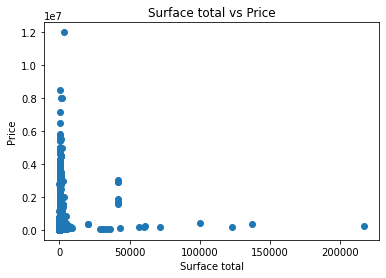

In [ ]:
plt.scatter(mahal.property_surface_total,mahal.property_price)
plt.title('Surface total vs Price')
plt.xlabel('Surface total')
plt.ylabel('Price')
plt.show()

##### Mahalanobis

A continuacion lo que haremos sera el analisis entre ambas variables nuevamente, con la salvedad de que ahora lo que utilizaremos sera la distancia de mahalanobis, ya que nos informa de los resultados de manera mas precisa.

In [ ]:
X = mahal[['property_surface_total','property_price']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_sfto_prc'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

latitud   longitud         place_l2       place_l3       place_l4  \
92828  -34.622385 -58.448886  Capital Federal      Caballito      Caballito   
19975  -34.618084 -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -34.601159 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -34.605542 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -34.593266 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  property_rooms  property_bedrooms  \
92828   Departamento             4.0                3.0   
19975   Departamento             2.0                1.0   
266756  Departamento             1.0                1.0   
454638  Departamento             1.0                1.0   
409114  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
92828                    113.0                      97.0        288000.0   
19975                     70.0                      65.0        450000.0   
266756                    33.0                      30.0         77243.0   
454638                    30.0                      30.0         65000.0   
409114                    40.0                      40.0         79000.0   

        z_bedrooms  zm_bedrooms   z_price  zm_price  z_surface_covered  \
92828     0.957892       0.6745  0.200139  1.665746           0.006348   
19975    -0.810085      -0.6745  0.724609  3.539711          -0.023179   
266756   -0.810085      -0.6745 -0.482180 -0.772224          -0.055473   
454638   -0.810085      -0.6745 -0.521817 -0.913847          -0.055473   
409114   -0.810085      -0.6745 -0.476492 -0.751899          -0.046246   

        zm_surface_covered  z_surface_total  zm_surface_total  mahal_sfto_prc  
92828             1.252643        -0.000075           1.29504        0.044527  
19975             0.224833        -0.032962           0.13490        0.577068  
266756           -0.899333        -0.061260          -0.86336        0.251898  
454638           -0.899333        -0.063554          -0.94430        0.294897  
409114           -0.578143        -0.055906          -0.67450        0.245541

In [ ]:
np.sort(mahal.mahal_sfto_prc)

array([8.47305638e-07, 2.90162386e-06, 3.20535472e-06, ...,
       9.35451614e+03, 1.16010339e+04, 2.91341844e+04])

A continuacion lo que haremos sera establecer un umbral para el cual los valores puntuales que se encuentran por fuera de este seran considerados outliers. Para definir estas distancias consideramos lo calculado con Mahalanobis, y procedemos a colorearlas en el siguiente grafico.

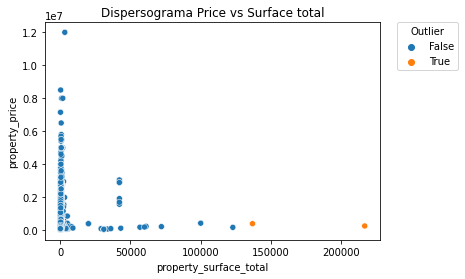

In [ ]:
umbral=10000
mahal[mahal['mahal_sfto_prc']>umbral]

es_outlier = (mahal['mahal_sfto_prc'] > umbral)
sns.scatterplot(x=mahal.property_surface_total,y=mahal.property_price, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Price vs Surface total')
plt.show()

##### Caracteristicas

Podemos visualizar que los valores que se encuentran particularmente alejados de la masa de observaciones caben dentro de la clasificación de outliers globales.

##### Conclusiones

Podemos notar que la mayor cantidad de valores cumple que mientras menor sea la superficie total mas alto sera el precio de la propiedad. Tenemos algunas excepciones en donde la superficie crece pero no se cumple el incremento del precio, lo cual nos resulta bastante extraño. Procedemos a determinarlos como valores atipicos. 

#### Property rooms vs Property bedrooms

Una de las observaciones que podríamos realizar es que no puede existir una diferencia de más de una unidad entre ambientes y habitaciones, puesto que si un departamento se vende como "3 ambientes" eso implica que tiene 2 habitaciones. En esa línea, podríamos estudiar las diferencias existentes entre las observaciones definidas como outliers por el boxplot previamente graficado:

In [ ]:
deptos = df[(df.property_rooms >= out_sup) & (df.property_type == 'Departamento')]

(deptos.property_rooms - deptos.property_bedrooms).unique()

array([], dtype=float64)

##### Scatter

Nuevamente realizamos un grafico para observar la relacion entre ambas variables a analizar.

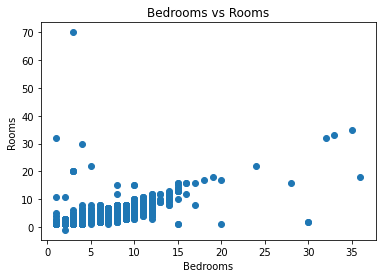

In [ ]:
plt.scatter(mahal.property_rooms,mahal.property_bedrooms)
plt.title('Bedrooms vs Rooms')
plt.xlabel('Bedrooms')
plt.ylabel('Rooms')
plt.show()

##### Mahalanobis

Nuevamente calculamos la distancia de Mahalanobis, la cual utilizaremos luego para determinar el umbral para los valores atipicos.

In [ ]:
X = mahal[['property_rooms','property_bedrooms']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_ro_bdro'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

latitud   longitud         place_l2       place_l3       place_l4  \
92828  -34.622385 -58.448886  Capital Federal      Caballito      Caballito   
19975  -34.618084 -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -34.601159 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -34.605542 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -34.593266 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  property_rooms  property_bedrooms  \
92828   Departamento             4.0                3.0   
19975   Departamento             2.0                1.0   
266756  Departamento             1.0                1.0   
454638  Departamento             1.0                1.0   
409114  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  ...  z_bedrooms  \
92828                    113.0                      97.0  ...    0.957892   
19975                     70.0                      65.0  ...   -0.810085   
266756                    33.0                      30.0  ...   -0.810085   
454638                    30.0                      30.0  ...   -0.810085   
409114                    40.0                      40.0  ...   -0.810085   

        zm_bedrooms   z_price  zm_price  z_surface_covered  \
92828        0.6745  0.200139  1.665746           0.006348   
19975       -0.6745  0.724609  3.539711          -0.023179   
266756      -0.6745 -0.482180 -0.772224          -0.055473   
454638      -0.6745 -0.521817 -0.913847          -0.055473   
409114      -0.6745 -0.476492 -0.751899          -0.046246   

        zm_surface_covered  z_surface_total  zm_surface_total  mahal_sfto_prc  \
92828             1.252643        -0.000075           1.29504        0.044527   
19975             0.224833        -0.032962           0.13490        0.577068   
266756           -0.899333        -0.061260          -0.86336        0.251898   
454638           -0.899333        -0.063554          -0.94430        0.294897   
409114           -0.578143        -0.055906          -0.67450        0.245541   

        mahal_ro_bdro  
92828        1.009266  
19975        0.892102  
266756       2.464815  
454638       2.464815  
409114       2.464815  

[5 rows x 21 columns]

Nuevamente ordenamos los valores obtenidos con el metodo.

In [ ]:
np.sort(mahal.mahal_ro_bdro)

array([2.38459394e-02, 2.38459394e-02, 2.38459394e-02, ...,
       4.11858311e+03, 5.46976651e+03, 2.56225334e+04])

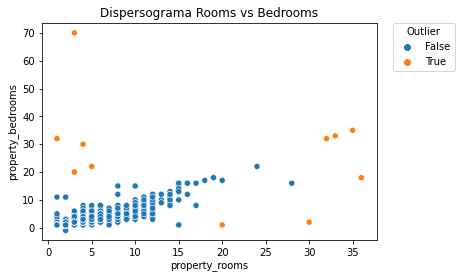

In [ ]:
umbral=700
mahal[mahal['mahal_ro_bdro']>umbral]

es_outlier = (mahal['mahal_ro_bdro'] > umbral)

sns.scatterplot(x=mahal.property_rooms,y=mahal.property_bedrooms, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Rooms vs Bedrooms')
plt.show()

##### Caracteristicas

Notamos que estamos en presencia de outliers en su mayoría globales, con la particularidad de que tenemos algunos casos de valores atípicos colectivos en las cercanías del rango equivalente a 30 respecto del eje `property_bedrooms`.

Adicionalmente, cabe destacar que hay dos valores particularmente alejados. Siguiendo esta línea, llegamos a la conclusión de que estamos en presencia de outliers globales.

##### Conclusiones

Luego de observar la distribucion entre ambas variables determinamos un umbral puntual que coloree los valores mas alejados a la concentracion principal.

De un analisis podemos notar que a medida que se incrementa la cantidad de habitaciones, tambien lo hace la cantidad de baños, aunque en una menor proporcion que la anterior. 

Teniendo en consideracion esto, es que nos llaman la atencion los valores que se encuentran en los extremos superior izquierdo e inferior derecho. Aunque podria suceder que una propiedad tenga cierta desproporcion en estas habitaciones, no es un valor que estemos acostumbrados a esperar. Concluimos coloreandolo como valor atipico.

#### Property rooms vs Property surface total

##### Scatter


Exponemos la relacion entre las variables rooms vs suface total.

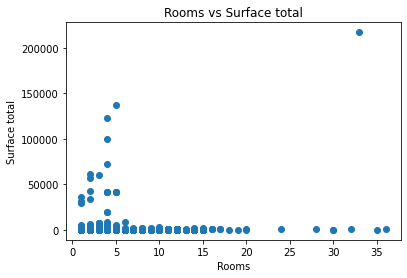

In [ ]:
plt.scatter(mahal.property_rooms,mahal.property_surface_total)
plt.title('Rooms vs Surface total')
plt.xlabel('Rooms')
plt.ylabel('Surface total')
plt.show()

##### Mahalanobis

Para poder determinar concretamente estos valores atipicos, nos ayudamos con el calculo de la distancia de mahalanobis para cada una de las observaciones presentes.

In [ ]:
X = mahal[['property_rooms','property_surface_total']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_ro_sfto'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

latitud   longitud         place_l2       place_l3       place_l4  \
92828  -34.622385 -58.448886  Capital Federal      Caballito      Caballito   
19975  -34.618084 -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -34.601159 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -34.605542 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -34.593266 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  property_rooms  property_bedrooms  \
92828   Departamento             4.0                3.0   
19975   Departamento             2.0                1.0   
266756  Departamento             1.0                1.0   
454638  Departamento             1.0                1.0   
409114  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  ...  zm_bedrooms  \
92828                    113.0                      97.0  ...       0.6745   
19975                     70.0                      65.0  ...      -0.6745   
266756                    33.0                      30.0  ...      -0.6745   
454638                    30.0                      30.0  ...      -0.6745   
409114                    40.0                      40.0  ...      -0.6745   

         z_price  zm_price  z_surface_covered  zm_surface_covered  \
92828   0.200139  1.665746           0.006348            1.252643   
19975   0.724609  3.539711          -0.023179            0.224833   
266756 -0.482180 -0.772224          -0.055473           -0.899333   
454638 -0.521817 -0.913847          -0.055473           -0.899333   
409114 -0.476492 -0.751899          -0.046246           -0.578143   

        z_surface_total  zm_surface_total  mahal_sfto_prc  mahal_ro_bdro  \
92828         -0.000075           1.29504        0.044527       1.009266   
19975         -0.032962           0.13490        0.577068       0.892102   
266756        -0.061260          -0.86336        0.251898       2.464815   
454638        -0.063554          -0.94430        0.294897       2.464815   
409114        -0.055906          -0.67450        0.245541       2.464815   

        mahal_ro_sfto  
92828        0.753930  
19975        0.363487  
266756       1.788765  
454638       1.788903  
409114       1.788699  

[5 rows x 22 columns]

In [ ]:
np.sort(mahal.mahal_ro_sfto)

array([1.73406761e-02, 1.73406761e-02, 1.73406761e-02, ...,
       5.54880427e+04, 6.88207911e+04, 1.71735307e+05])

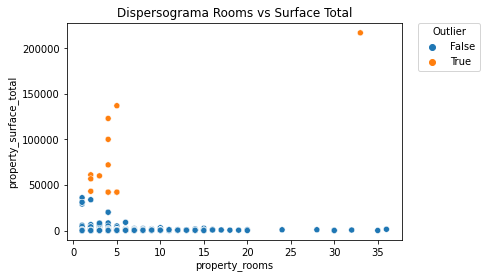

In [ ]:
umbral=5000
mahal[mahal['mahal_ro_sfto']>umbral]

es_outlier = (mahal['mahal_ro_sfto'] > umbral)

sns.scatterplot(x=mahal.property_rooms,y=mahal.property_surface_total, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Rooms vs Surface Total')
plt.show()

##### Caracteristicas

En esta nueva comparación, contamos -una vez más- con la presencia de registros aislados en la parte superior izquierda que podríamos clasificarlos como outliers globales.

##### Conclusiones

#### Property rooms vs Property surface covered

##### Scatter

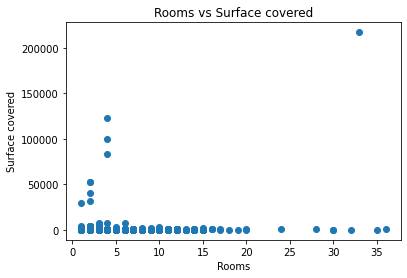

In [ ]:
plt.scatter(df.property_rooms,df.property_surface_covered)
plt.title('Rooms vs Surface covered')
plt.xlabel('Rooms')
plt.ylabel('Surface covered')
plt.show()

##### Mahalanobis

In [ ]:
X = mahal[['property_rooms','property_surface_covered']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_ro_sfcv'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

latitud   longitud         place_l2       place_l3       place_l4  \
92828  -34.622385 -58.448886  Capital Federal      Caballito      Caballito   
19975  -34.618084 -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -34.601159 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -34.605542 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -34.593266 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  property_rooms  property_bedrooms  \
92828   Departamento             4.0                3.0   
19975   Departamento             2.0                1.0   
266756  Departamento             1.0                1.0   
454638  Departamento             1.0                1.0   
409114  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  ...   z_price  \
92828                    113.0                      97.0  ...  0.200139   
19975                     70.0                      65.0  ...  0.724609   
266756                    33.0                      30.0  ... -0.482180   
454638                    30.0                      30.0  ... -0.521817   
409114                    40.0                      40.0  ... -0.476492   

        zm_price  z_surface_covered  zm_surface_covered  z_surface_total  \
92828   1.665746           0.006348            1.252643        -0.000075   
19975   3.539711          -0.023179            0.224833        -0.032962   
266756 -0.772224          -0.055473           -0.899333        -0.061260   
454638 -0.913847          -0.055473           -0.899333        -0.063554   
409114 -0.751899          -0.046246           -0.578143        -0.055906   

        zm_surface_total  mahal_sfto_prc  mahal_ro_bdro  mahal_ro_sfto  \
92828            1.29504        0.044527       1.009266       0.753930   
19975            0.13490        0.577068       0.892102       0.363487   
266756          -0.86336        0.251898       2.464815       1.788765   
454638          -0.94430        0.294897       2.464815       1.788903   
409114          -0.67450        0.245541       2.464815       1.788699   

        mahal_ro_sfcv  
92828        0.608867  
19975        0.327381  
266756       1.476959  
454638       1.476959  
409114       1.511979  

[5 rows x 23 columns]

In [ ]:
np.sort(mahal.mahal_ro_sfcv)

array([8.44779254e-03, 8.44779254e-03, 8.44779254e-03, ...,
       7.30810278e+05, 1.10503515e+06, 3.40770110e+06])

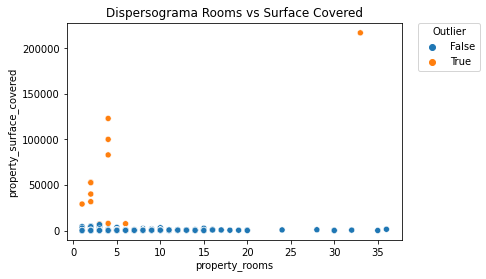

In [ ]:
umbral=3000
mahal[mahal['mahal_ro_sfcv']>umbral]

es_outlier = (mahal['mahal_ro_sfcv'] > umbral)

sns.scatterplot(x=mahal.property_rooms,y=mahal.property_surface_covered, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Rooms vs Surface Covered')
plt.show()

##### Caracteristicas

Luego de la comparación de surface covered vs property rooms, notamos que nuevamente estamos en presencia de outliers, en particular esta vez todos de carácter global.


#### Property rooms vs Property price

##### Scatter

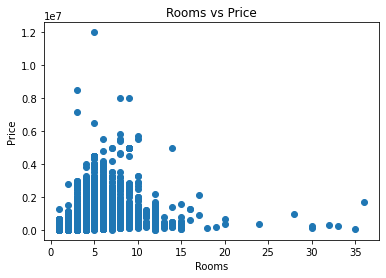

In [ ]:
plt.scatter(mahal.property_rooms,mahal.property_price)
plt.title('Rooms vs Price')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

##### Mahalanobis

In [ ]:
X = mahal[['property_rooms','property_price']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_ro_pr'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

latitud   longitud         place_l2       place_l3       place_l4  \
92828  -34.622385 -58.448886  Capital Federal      Caballito      Caballito   
19975  -34.618084 -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -34.601159 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -34.605542 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -34.593266 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  property_rooms  property_bedrooms  \
92828   Departamento             4.0                3.0   
19975   Departamento             2.0                1.0   
266756  Departamento             1.0                1.0   
454638  Departamento             1.0                1.0   
409114  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  ...  zm_price  \
92828                    113.0                      97.0  ...  1.665746   
19975                     70.0                      65.0  ...  3.539711   
266756                    33.0                      30.0  ... -0.772224   
454638                    30.0                      30.0  ... -0.913847   
409114                    40.0                      40.0  ... -0.751899   

        z_surface_covered  zm_surface_covered  z_surface_total  \
92828            0.006348            1.252643        -0.000075   
19975           -0.023179            0.224833        -0.032962   
266756          -0.055473           -0.899333        -0.061260   
454638          -0.055473           -0.899333        -0.063554   
409114          -0.046246           -0.578143        -0.055906   

        zm_surface_total  mahal_sfto_prc  mahal_ro_bdro  mahal_ro_sfto  \
92828            1.29504        0.044527       1.009266       0.753930   
19975            0.13490        0.577068       0.892102       0.363487   
266756          -0.86336        0.251898       2.464815       1.788765   
454638          -0.94430        0.294897       2.464815       1.788903   
409114          -0.67450        0.245541       2.464815       1.788699   

        mahal_ro_sfcv  mahal_ro_pr  
92828        0.608867     0.736415  
19975        0.327381     1.844594  
266756       1.476959     1.822743  
454638       1.476959     1.805142  
409114       1.511979     1.825630  

[5 rows x 24 columns]

In [ ]:
np.sort(mahal.mahal_ro_pr)

array([9.61117476e-03, 9.61175129e-03, 9.61175129e-03, ...,
       7.73629621e+02, 1.00102627e+03, 1.95556496e+03])

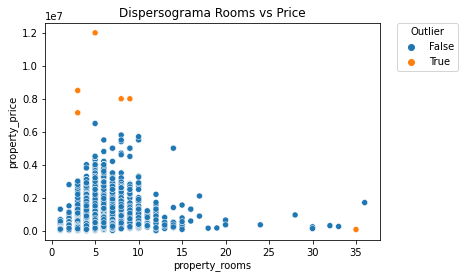

In [ ]:
umbral=700
mahal[mahal['mahal_ro_pr']>umbral]

es_outlier = (mahal['mahal_ro_pr'] > umbral)

sns.scatterplot(x=mahal.property_rooms,y=mahal.property_price, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Rooms vs Price')
plt.show()

##### Caracteristicas

Nuevamente visualizamos outliers globales.

## **1d. Reducción de la dimensionalidad**

Para realizar la reducción de la dimensionalidad del dataset, estaremos utilizando el algoritmo PCA con el objetivo de reducir la dimensión del problema descartando la información redundante existente.

Generamos un nuevo dataset de reducción de dimensionalidad:

In [ ]:
df_reduc = df.copy()

Normalizamos el data set

In [ ]:
columnas_elegidas = ['property_rooms', 'property_bedrooms', 'property_surface_covered', 'property_surface_total']

x = df_reduc.loc[:, columnas_elegidas].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=4)
x_transformada = pca.fit_transform(x)

pca_df_aux = pd.DataFrame(data = x_transformada
             , columns = ['cp_1', 'cp_2','cp_3','cp_4'])

In [ ]:
df_reduc['target'] = 0
target = pd.DataFrame((np.column_stack(df_reduc['target'])).tolist()).T
df_pca = pd.concat([pca_df_aux, target], axis = 1)
df_pca.columns= ['cp_1', 'cp_2','cp_3','cp_4','target']
df_pca.head()

cp_1      cp_2      cp_3      cp_4  target
0  2.824265  0.156156  0.162303  0.057658       0
1 -2.188546 -0.080832  0.407981  0.031628       0
2 -2.232467 -0.030093  0.411418 -0.026497       0
3 -1.904769 -0.350321  0.433037 -0.099681       0
4  5.291453 -0.578361 -1.190110  0.686330       0

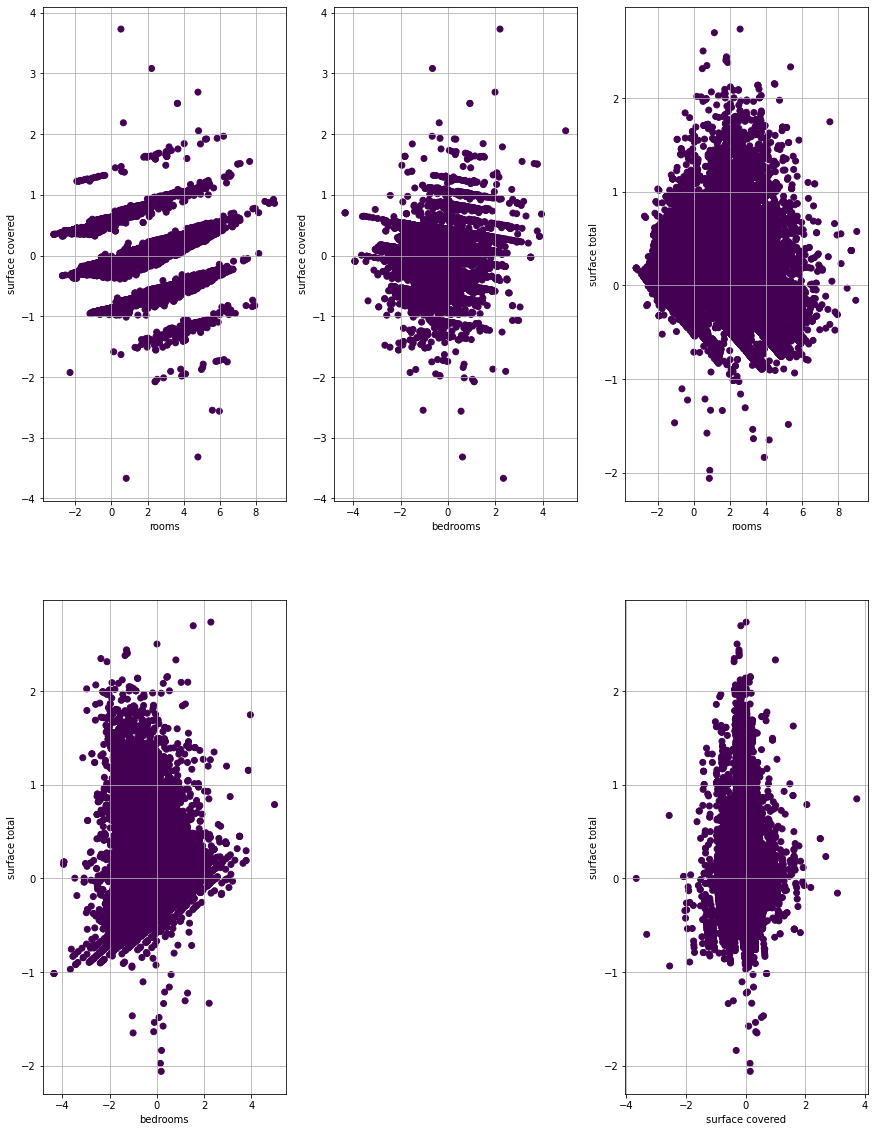

In [ ]:
targets = ['Casa', 'PH', 'Departamento']

fig = plt.figure(figsize = (20,20))

c = df_pca['target']

# plot 1

ax = fig.add_subplot(2, 4, 1) 

x = df_pca['cp_1']
y = df_pca['cp_3']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('rooms', fontsize = 10)
ax.set_ylabel('surface covered', fontsize = 10)
ax.grid()

# plot 2

ax = fig.add_subplot(2, 4, 2) 

x = df_pca['cp_2']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('bedrooms', fontsize = 10)
ax.set_ylabel('surface covered', fontsize = 10)
ax.grid()

# plot 3

ax = fig.add_subplot(2, 4, 3) 

x = df_pca['cp_1']
y = df_pca['cp_4']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('rooms', fontsize = 10)
ax.set_ylabel('surface total', fontsize = 10)
ax.grid()

# plot 5

ax = fig.add_subplot(2, 4, 5) 

x = df_pca['cp_2']
y = df_pca['cp_4']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('bedrooms', fontsize = 10)
ax.set_ylabel('surface total', fontsize = 10)
ax.grid()

# plot 7

ax = fig.add_subplot(2, 4, 7) 

x = df_pca['cp_3']
y = df_pca['cp_4']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('surface covered', fontsize = 10)
ax.set_ylabel('surface total', fontsize = 10)
ax.grid()

plt.show()

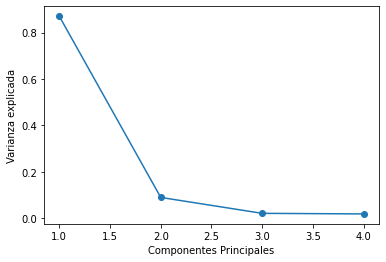

In [ ]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada)+1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

Exportamos el dataset generado luego de aplicar la reduccion de la dimensionalidad:

In [ ]:
df_reduc.to_csv('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/ds_reduc_dim.csv')

#  **2. Agrupamiento**

Primero removemos entradas del dataframe que contienen coordenadas fuera de CABA



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

CABA_lat = -34.611817
CABA_long = -58.446881

df = df.loc[((CABA_lat - 0.5) < df["latitud"]) & (df["latitud"] < (CABA_lat + 0.5))]
df = df.loc[((CABA_long - 0.5) < df["longitud"]) & (df["longitud"] < (CABA_long + 0.5))]

El primer análisis de clustering lo realizamos entre las variables longitud y latitud, viendo la tendencia al agrupamiento que existe en la posición geográfica:



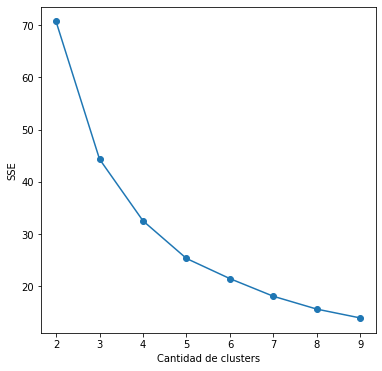

In [ ]:
X = np.column_stack((df.longitud.tolist(), df.latitud.tolist()))

sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Utilizando 5 clusters



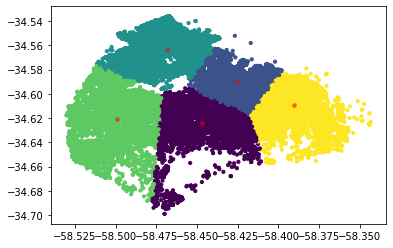

Silhouette Score para 5 clusters = 0.40923487539565123


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5,marker='.')
plt.show()
print ("Silhouette Score para 5 clusters = " + str(silhouette_score(X, y_kmeans)))

Utilizando 3 clusters



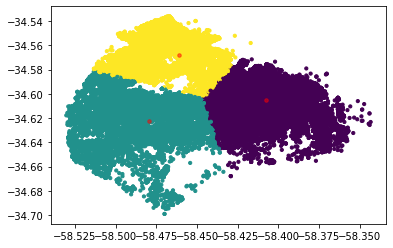

Silhouette Score para 3 clusters = 0.45850527502628013


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5,marker='.')
plt.show()

print ("Silhouette Score para 3 clusters = " + str(silhouette_score(X, y_kmeans)))

Viendo la curva de cantidad de clusters contra la distancia media al centroide (SSE) podemos ver que no existen clusters definidos, no se ve un claro codo en el cual elegir un numero de clusters ideal. No existen agrupamientos definidos.

Un segundo análisis que decidimos realizar es si existe clustering entre tres variables: longitud, latitud y precio. Obtuvimos los mismos resultados que el caso anterior:

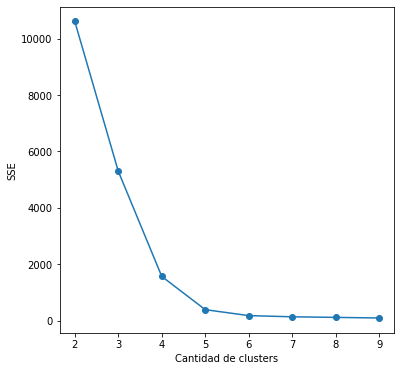

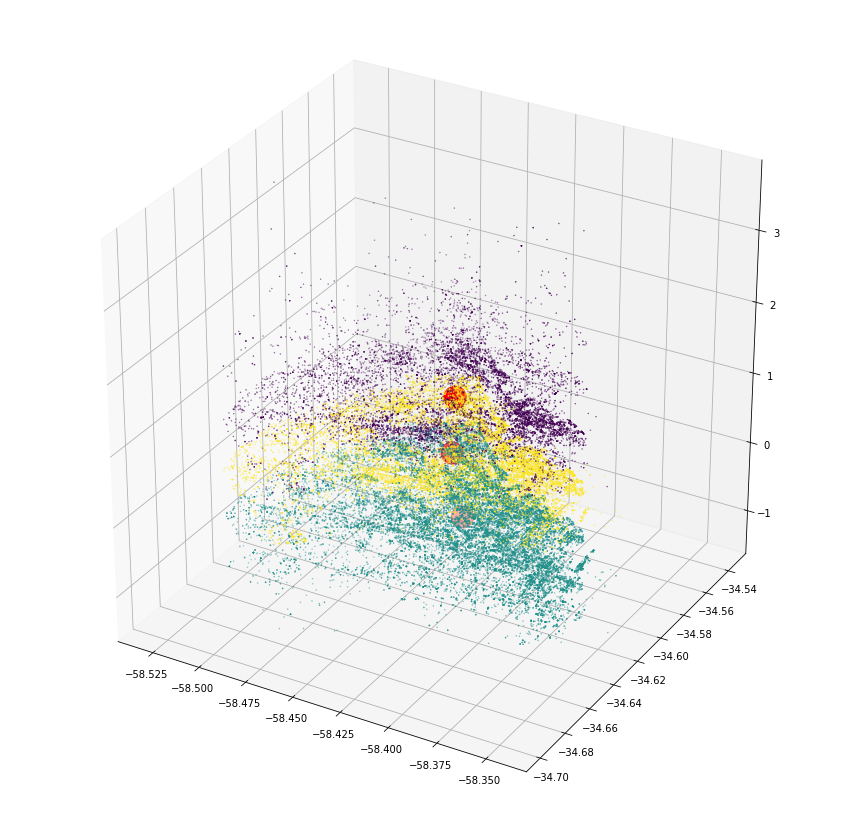

In [ ]:
X = df.iloc[:,[5,4,15]].values

sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

centers = kmeans.cluster_centers_
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_kmeans, s=0.2)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c="red", s=500, marker="o")

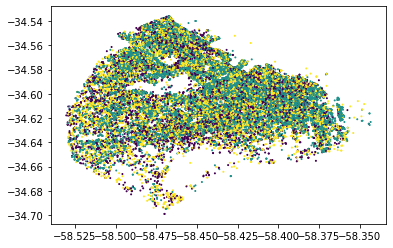

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=1)


Como no obtuvimos un clustering definido, buscamos ver si existía un agrupamiento entre ubicación geográfica y precio por metro cuadrado. Los resultados fueron similares.

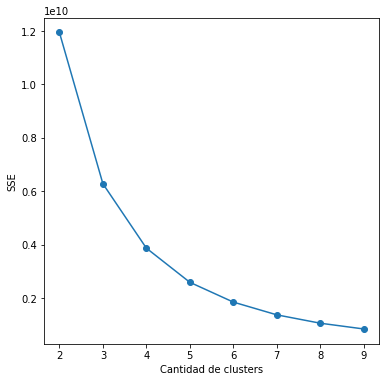

In [ ]:
df["property_m2price"] = df["property_price"] / df["property_surface_total"]
X = df.iloc[:,[5,4, df.shape[1]-1]].loc[(df.property_m2price < 5000)].values
sse = []
sscore = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    y_kmeans = km.predict(X)
    sse.append(km.inertia_)
    sscore.append(silhouette_score(X, y_kmeans))
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

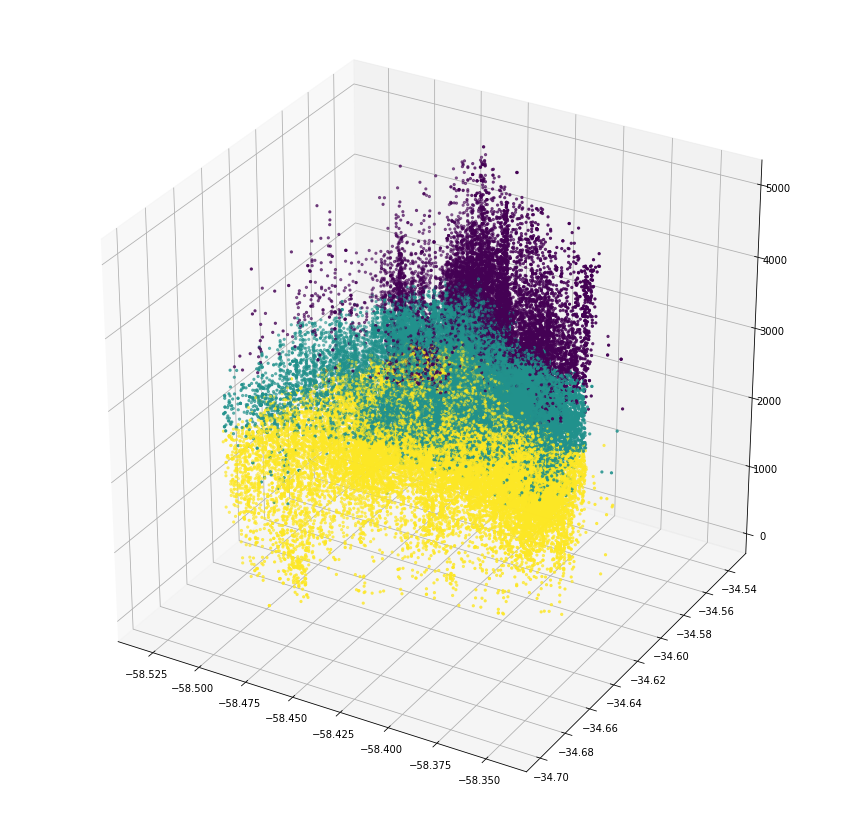

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_kmeans, s=5)

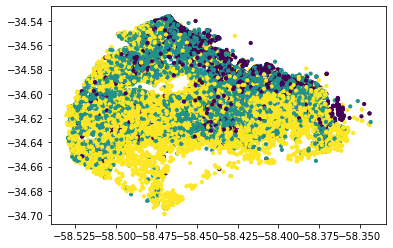

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)


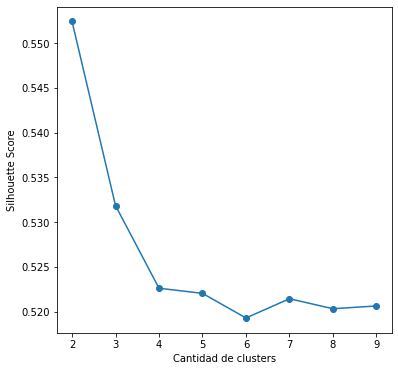

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sscore, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('Silhouette Score')
plt.show()

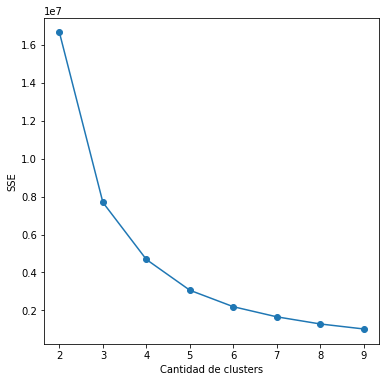

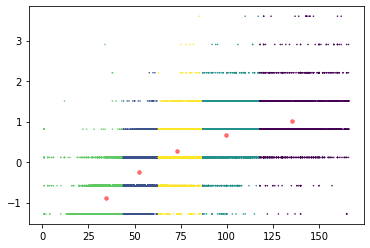

In [ ]:
X = df.iloc[:,[15,13]].values

sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

kmeans = KMeans(n_clusters=5, max_iter=900)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 1], X[:, 0], c=y_kmeans, s=0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=50, alpha=0.5,marker='.')
plt.show()

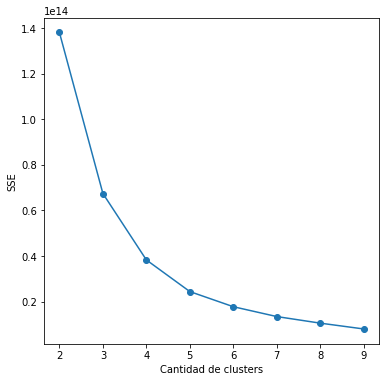

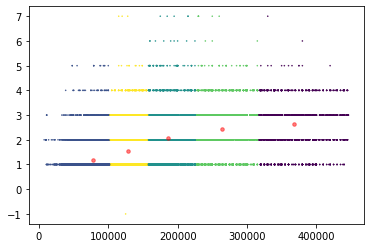

In [ ]:
X = df.iloc[:,[11,14]].loc[df.property_rooms.notna()].values

sse = []
list_k = list(range(2, 10))

for k in list_k:
   km = KMeans(n_clusters=k)
   km.fit(X)
   sse.append(km.inertia_)
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

kmeans = KMeans(n_clusters=5, max_iter=900)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 1], X[:, 0], c=y_kmeans, s=0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=50, alpha=0.5,marker='.')
plt.show()

#  **3. Clasificación**

## **3a. Construcción del target**

3.a.1 Primera alternativa, variable pxm2 en 3 intervalos con igual cantidad de observaciones

In [ ]:
df.sort_values(by=["property_m2price"], inplace=True)

In [ ]:
df['tipo_precio_1'] = pd.qcut(x=df['property_m2price'], q=3, labels=['bajo', 'medio', 'alto'])

3.a.2 Segunda alternativa, variable pxm2 en 3 intervalos, 25% a bajo, 50% a medio y el otro 25% restante a alto

In [ ]:
df['tipo_precio_2'] = pd.qcut(x=df['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto'])
df['tipo_precio_2'].replace("medio2","medio", inplace=True)

3.a.3 Tercera alternativa, como el punto anterior pero separado por tipo de propiedad

In [ ]:
df['tipo_precio_3'] = pd.qcut(x=df.loc[df['property_type'] == 'Departamento']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio")
df['tipo_precio_3'].fillna(pd.qcut(x=df.loc[df['property_type'] == 'Casa']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio"), inplace=True)
df['tipo_precio_3'].fillna(pd.qcut(x=df.loc[df['property_type'] == 'PH']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio"), inplace=True)

Analizamos las distribuciones del precio por metro cuadrado, el precio por metro cuadrado segun el tipo de propiedad y las distribuciones de los tipos de precio segun tipo de propiedad. Es importante notar que los gráficos estan en escala logarítmica ya que las cantidades tienen ordenes de magnitud muy distintos.

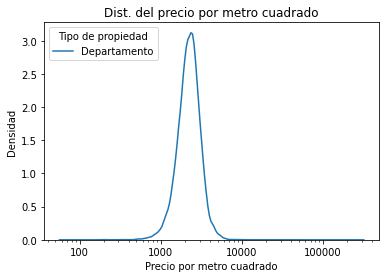

In [ ]:
sns.kdeplot(data=df, x="property_m2price", log_scale=True).set(title='Dist. del precio por metro cuadrado')
plt.xlabel('Precio por metro cuadrado')
plt.ylabel('Densidad')
plt.legend(title='Tipo de propiedad', loc='upper left', labels=['Departamento', 'PH', 'Casa'])
ax=plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

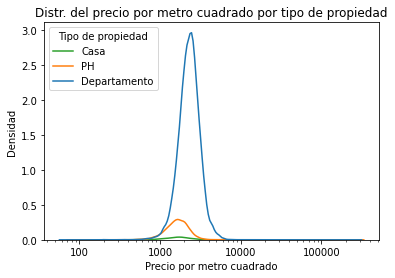

In [ ]:
sns.kdeplot(data=df, x="property_m2price", hue="property_type", log_scale=True).set(title='Distr. del precio por metro cuadrado por tipo de propiedad')
plt.xlabel('Precio por metro cuadrado')
plt.ylabel('Densidad')
plt.legend(title='Tipo de propiedad', loc='upper left', labels=['Casa', 'PH', 'Departamento'])
ax=plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

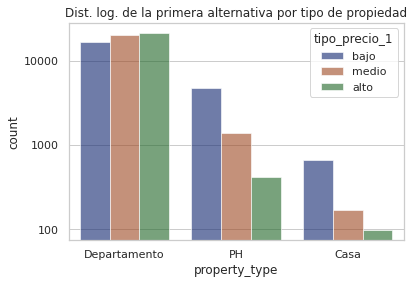

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(
    x='property_type',
    hue='tipo_precio_1',
    data=df,palette="dark",
    alpha=.6,
    log=True).set(title='Dist. log. de la primera alternativa por tipo de propiedad')
ax=plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

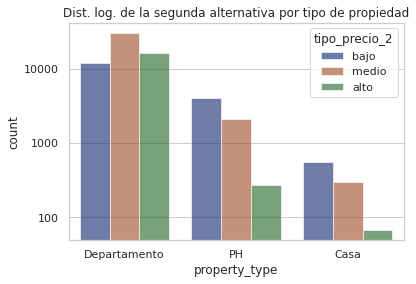

In [ ]:
sns.countplot(
    x='property_type',
    hue='tipo_precio_2',
    data=df,palette="dark",
    alpha=.6,
    log=True).set(title='Dist. log. de la segunda alternativa por tipo de propiedad')
ax=plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

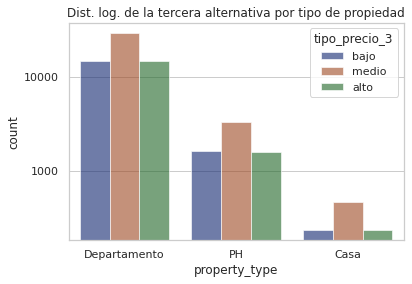

In [ ]:
sns.countplot(
    x='property_type',
    hue='tipo_precio_3',
    data=df,palette="dark",
    alpha=.6,
    log=True).set(title='Dist. log. de la tercera alternativa por tipo de propiedad')
ax=plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

Analizando el gráfico "Distr. del precio por metro cuadrado por tipo de propiedad" podemos ver que la mediana del precio es distinta según el tipo de propiedad. Por este motivo decidimos que la mejor alternativa es la tercera, ya que separa las bandas de precio según el tipo de propiedad.

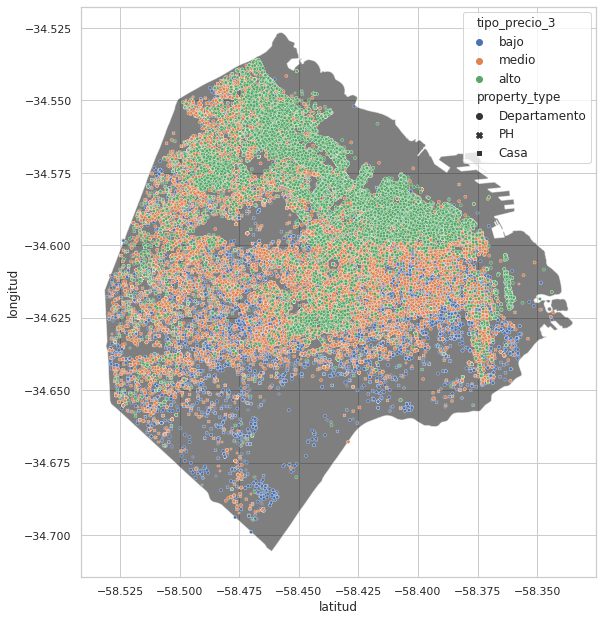

In [ ]:
gpd.read_file('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/caba.geojson').plot(cmap='cubehelix', alpha=0.5)
sns.scatterplot(x="longitud", 
                y="latitud", 
                s=10,
                hue="tipo_precio_3",
                style="property_type",
                data=df,
                palette="deep")
plt.xlabel("latitud")
plt.ylabel("longitud")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Realizamos el agrupamiento por K-means

In [ ]:
df_aux=df.loc[(df.property_m2price < 8000)]
X = df_aux.loc[:,["latitud","longitud", "property_m2price"]].values
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

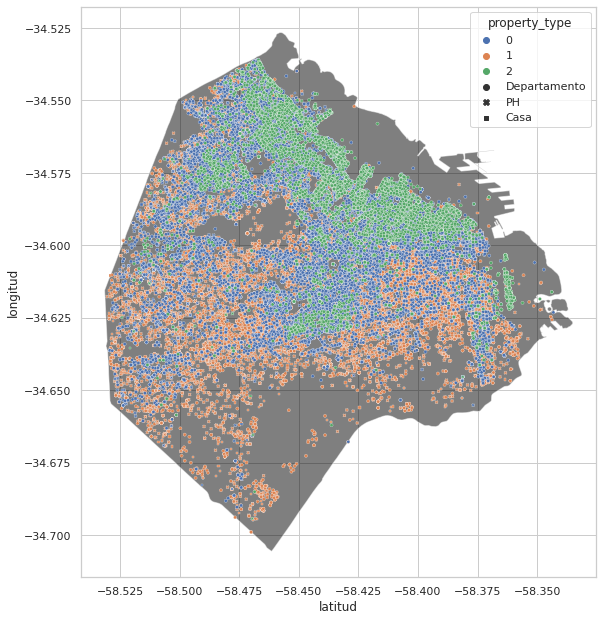

In [ ]:
gpd.read_file('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/caba.geojson').plot(cmap='cubehelix', alpha=0.5)
sns.scatterplot(x="longitud", 
                y="latitud", 
                s=10,
                hue=y_kmeans,
                style="property_type",
                data=df_aux,
                palette="deep")
plt.xlabel("latitud")
plt.ylabel("longitud")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Observando los mapas resultantes, podemos ver que los dos tipos de agrupamientos dieron resultaros similares

## **3b. Entrenamiento y Predicción**

Primero creamos un dataset sin los features a predecir. También quitamos las columnas "place" superiores a l4, que tienen información repetida y las columnas de variables reducidasm que utilizaremos para otros modelos.

In [ ]:
df.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l2', 'place_l3', 'place_l4', 'property_type', 'property_rooms',
       'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price', 'z_rooms', 'zm_rooms',
       'z_bedrooms', 'zm_bedrooms', 'z_price', 'zm_price', 'z_surface_covered',
       'zm_surface_covered', 'z_surface_total', 'zm_surface_total',
       'property_m2price', 'tipo_precio_1', 'tipo_precio_2', 'tipo_precio_3'],
      dtype='object')

In [ ]:
ds_trabajo_x=df.drop(['tipo_precio_1', 'tipo_precio_2', 'tipo_precio_3', 'z_price', 'zm_price', 'place_l2', 'place_l3', 'property_price', 'id', 'property_m2price','z_rooms','zm_rooms','z_bedrooms','zm_bedrooms','z_surface_covered','zm_surface_covered','z_surface_total',
    'zm_surface_total'], axis='columns')

Reemplazamos las fechas por valores numéricos

In [ ]:
import math
import sys
max_end_date = max(ds_trabajo_x['end_date'])
ds_trabajo_x['start_date'] = ds_trabajo_x['start_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['start_date']))
ds_trabajo_x['end_date'] = ds_trabajo_x['end_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max_end_date.toordinal())
ds_trabajo_x['created_on'] = ds_trabajo_x['created_on'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['created_on']))

Creamos un dataframe para el entrenamiento con variables reducidas

In [ ]:
from scipy.stats import zscore
numeric_cols = ds_trabajo_x.select_dtypes(include=[np.number]).columns # Solo en las de tipo numérico
ds_reducida_x = ds_trabajo_x[numeric_cols].apply(zscore)
ds_reducida_x['property_type'] = ds_trabajo_x['property_type'] 
ds_reducida_x['place_l4'] = ds_trabajo_x['place_l4'] 

Realizamos one hot encoding para las variables cualitativas

In [ ]:
ds_trabajo_x = pd.get_dummies(ds_trabajo_x, columns=['place_l4', 'property_type'], drop_first=True)
ds_reducida_x = pd.get_dummies(ds_reducida_x, columns=['place_l4', 'property_type'], drop_first=True)

Luego creamos un dataset con la variable target

In [ ]:
ds_trabajo_y = df['tipo_precio_3'].copy()

Separamos en conjuntos de test y train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.2,
                                                    random_state=100)
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(ds_reducida_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.2,
                                                    random_state=100)

## Modelo 1: Arbol de Decisión

Primero entrenamos un arbol de decisión con las variables normales

In [ ]:
param_grid = {
    'max_depth': [*range(18, 23, 1)],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.00003,0.00004,0.00005, 0.00006,0.00007]}

grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [3e-05, 4e-05, 5e-05, 6e-05, 7e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 19, 20, 21, 22]})

In [ ]:
grid.best_params_

{'ccp_alpha': 6e-05, 'criterion': 'gini', 'max_depth': 22}

In [ ]:
y_pred = grid.predict(x_test)

Podemos ver los resultados con una matriz de confusión.
Orden: Alto, Bajo, Medio

Text(30.5, 0.5, 'True')

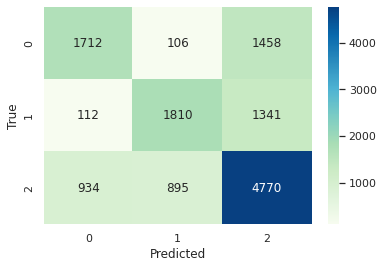

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train, y_train)
score_test = grid.score(x_test, y_test)
print('El Accuracy del modelo evaluando el set de train es: ', score_train, ' y el Accuracy del modelo evaluando el set de test es: ', score_test)

El Accuracy del modelo evaluando el set de train es:  0.7420171265461465  y el Accuracy del modelo evaluando el set de test es:  0.6311462931953113


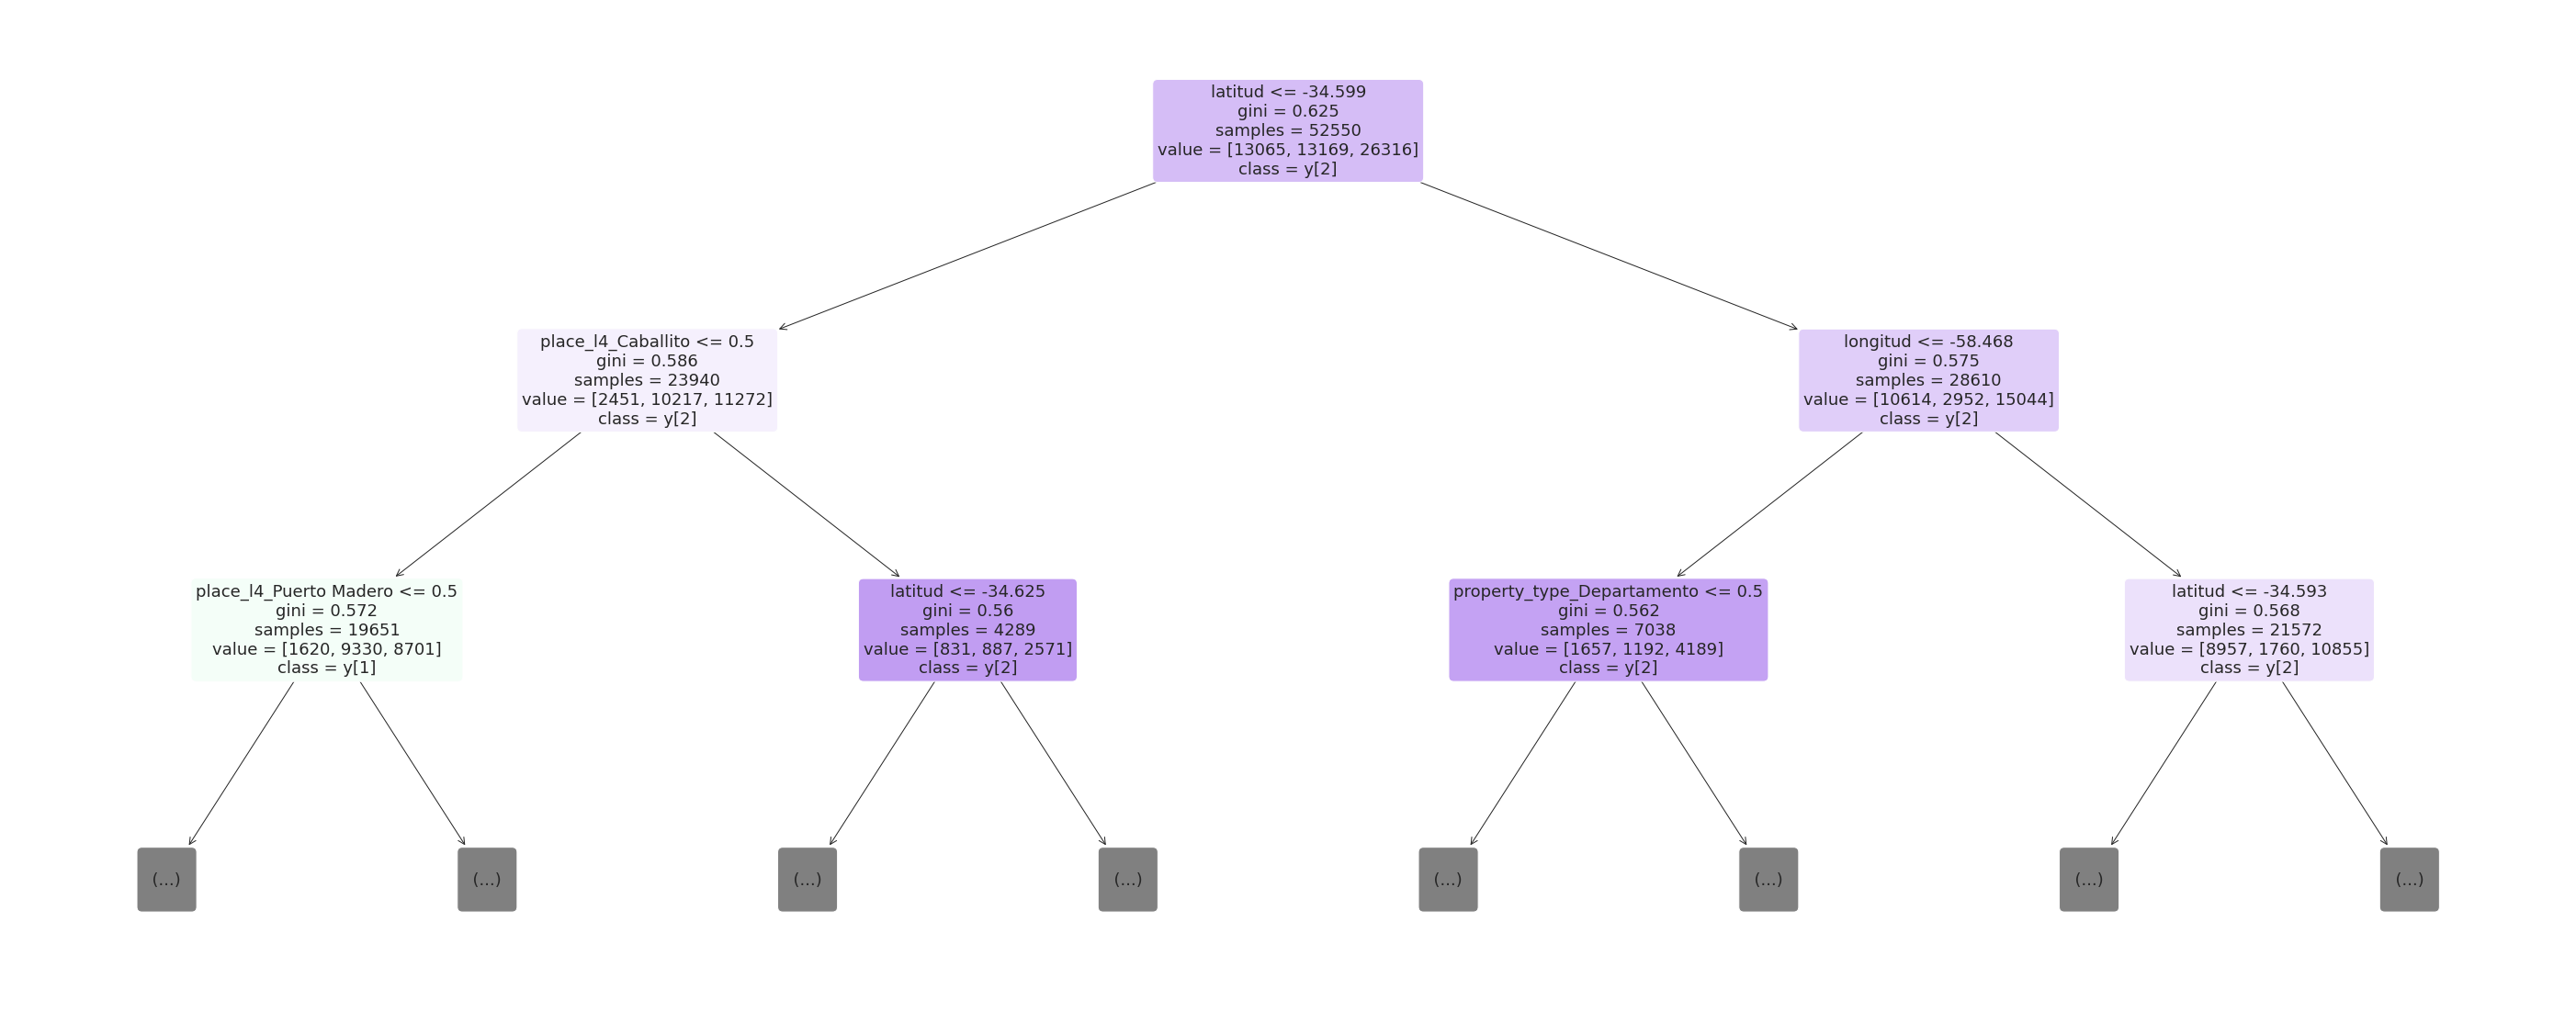

In [ ]:
plt.figure(figsize=(50,20))

tree_plot=tree.plot_tree(grid.best_estimator_,
                         max_depth=2,
                         feature_names=ds_trabajo_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

Luego entrenamos un arbol de decisión con las variables reducidas

In [ ]:
param_grid = {
    'max_depth': [*range(18, 23, 1)],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.00003,0.00004,0.00005, 0.00006,0.00007]}

grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(x_train_red, y_train_red)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [3e-05, 4e-05, 5e-05, 6e-05, 7e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 19, 20, 21, 22]})

In [ ]:
grid.best_params_

{'ccp_alpha': 6e-05, 'criterion': 'gini', 'max_depth': 22}

In [ ]:
y_pred = grid.predict(x_test_red)

Text(30.5, 0.5, 'True')

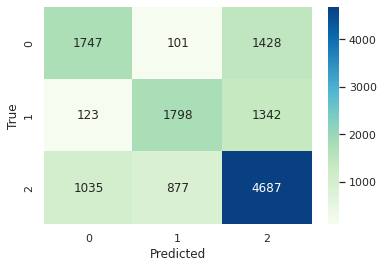

In [ ]:
matrix=confusion_matrix(y_test_red, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train_red, y_train_red)
score_test = grid.score(x_test_red, y_test_red)
print('El Accuracy del modelo evaluando el set de train reducido es: ', score_train, ' y el Accuracy del modelo evaluando el set de test reducido es: ', score_test)

El Accuracy del modelo evaluando el set de train reducido es:  0.7455946717411989  y el Accuracy del modelo evaluando el set de test reducido es:  0.6265793880347085


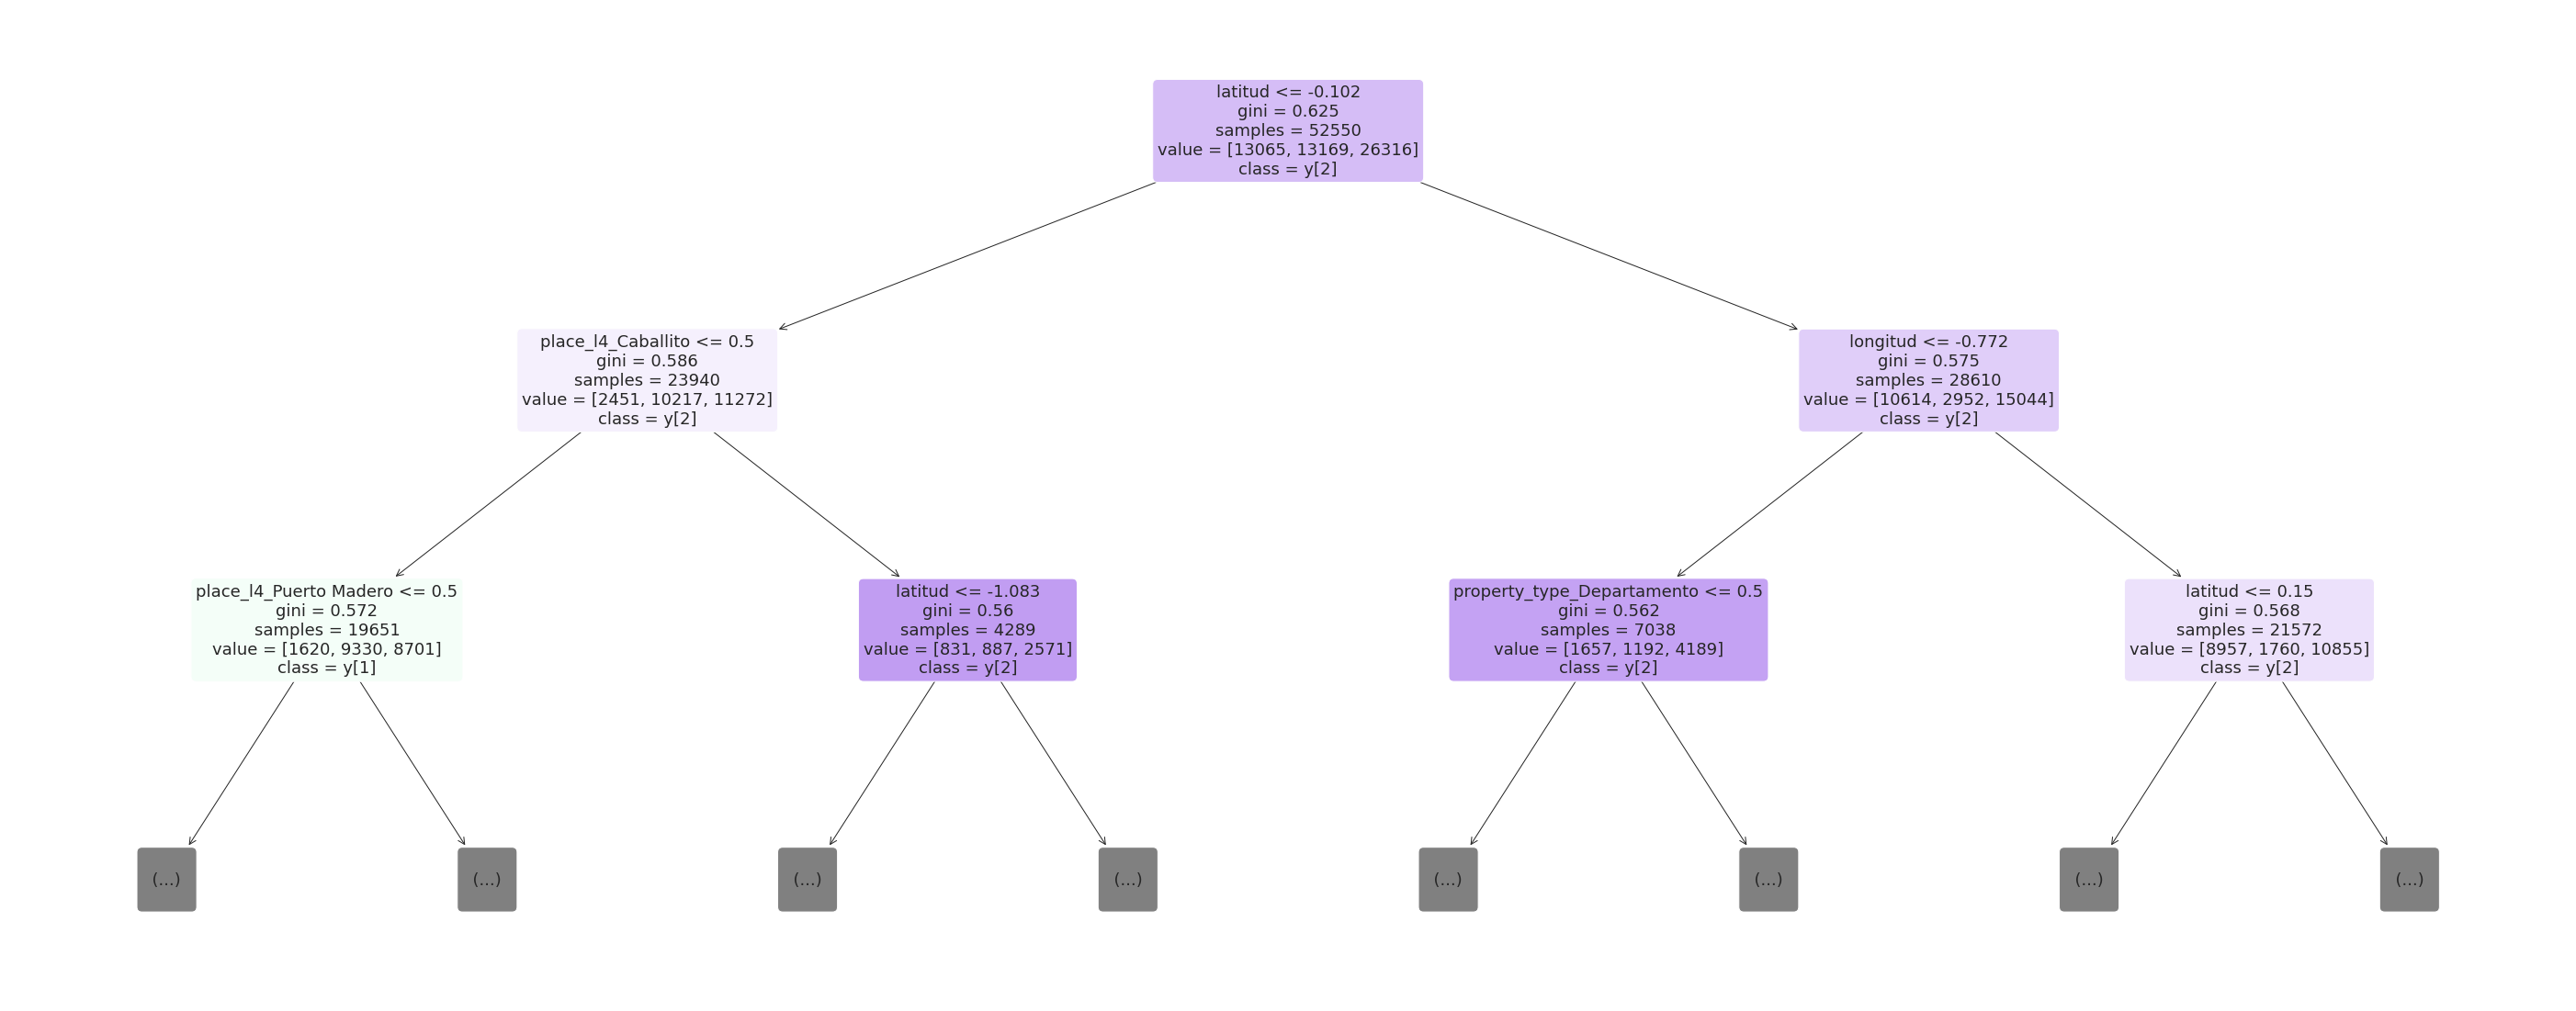

In [ ]:
plt.figure(figsize=(50,20))

tree_plot=tree.plot_tree(grid.best_estimator_,
                         max_depth=2,
                         feature_names=ds_reducida_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

El modelo decide en base a la ubicación geográfica de la propiedad. En primer lugar verifica la latitud, separando CABA en Norte y Sur.

Para la parte Sur, verifica el barrio de Caballito. En caso negativo, verifica si el barrio es Puerto Madero ya que las propiedades suelen tener mayor valor. Si Caballito es afirmativo, vuelve a verificar por  latitud si se trata de la parte Sur del mismo.

Para la parte Norte de CABA, verifica la longitud para ver si se trata de la zona Este u Oeste. Para la zona Este, basa su decisión en la latitud, verificando si se trata de la parte Norte de la misma.
En el caso de la zona Oeste, verifica si la propiedad se trata de un departamento.

## Modelo 2: Random Forest

Primero entrenamos un modelo Random Forest de decisión con las variables normales

In [ ]:
param_grid = {
    'n_estimators': [45, 55, 65],
    'max_depth': [23, 25, 27],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.00002,0.000025]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [2e-05, 2.5e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [23, 25, 27],
                         'n_estimators': [45, 55, 65]})

In [ ]:
grid.best_params_

{'ccp_alpha': 2e-05, 'criterion': 'gini', 'max_depth': 27, 'n_estimators': 55}

In [ ]:
y_pred = grid.predict(x_test)

Podemos ver los resultados con una matriz de confusión.
Orden: Alto, Bajo, Medio

Text(30.5, 0.5, 'True')

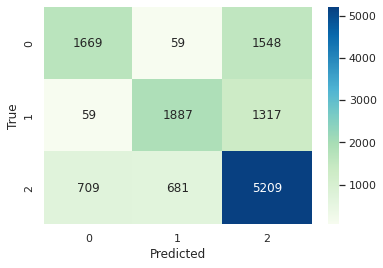

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train, y_train)
score_test = grid.score(x_test, y_test)
print('El Accuracy del modelo evaluando el set de train es: ', score_train, ' y el Accuracy del modelo evaluando el set de test es: ', score_test)

El Accuracy del modelo evaluando el set de train es:  0.9422074215033301  y el Accuracy del modelo evaluando el set de test es:  0.6671487288780636


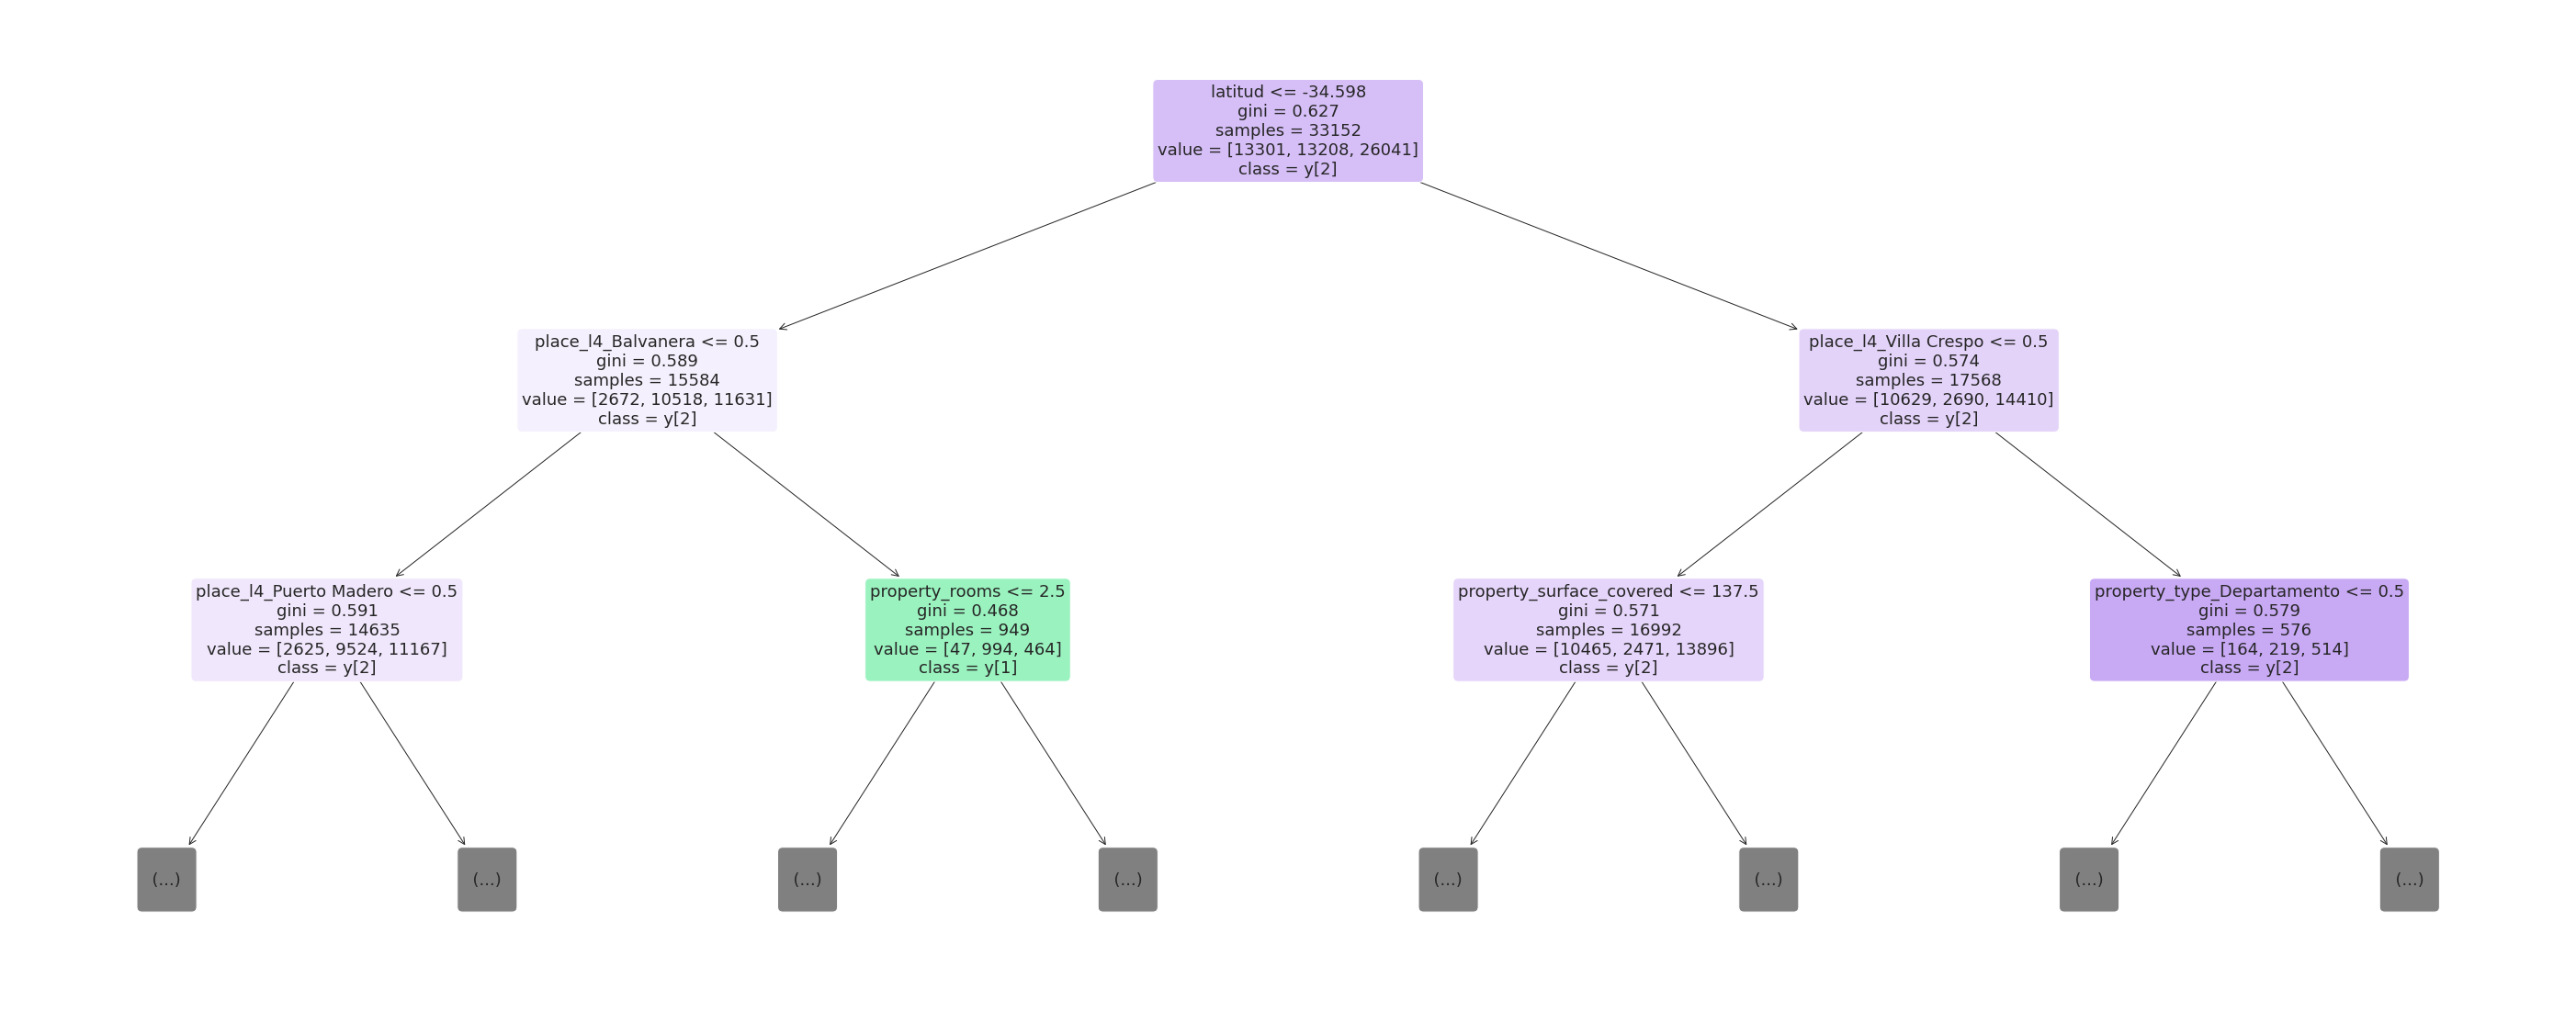

In [ ]:
plt.figure(figsize=(50,20))
tree_plot=tree.plot_tree(grid.best_estimator_.estimators_[1],
                         max_depth=2,
                         feature_names=ds_trabajo_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

Luego entrenamos un modelo Random Forest de decisión con las variables reducidas

In [ ]:
param_grid = {
    'n_estimators': [40, 55],
    'max_depth': [23, 25],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.00002,0.000025]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(x_train_red, y_train_red)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [2e-05, 2.5e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [23, 25], 'n_estimators': [40, 55]})

In [ ]:
grid.best_params_

{'ccp_alpha': 2e-05, 'criterion': 'gini', 'max_depth': 25, 'n_estimators': 55}

In [ ]:
y_pred = grid.predict(x_test_red)

Podemos ver los resultados con una matriz de confusión.
Orden: Alto, Bajo, Medio

Text(30.5, 0.5, 'True')

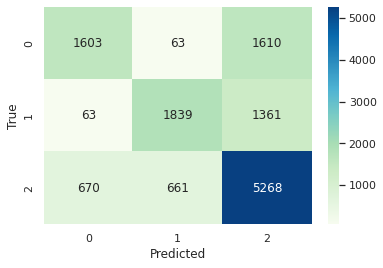

In [ ]:
matrix=confusion_matrix(y_test_red, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train_red, y_train_red)
score_test = grid.score(x_test_red, y_test_red)
print('El Accuracy del modelo evaluando el set de train reducido es: ', score_train, ' y el Accuracy del modelo evaluando el set de test reducido es: ', score_test)

El Accuracy del modelo evaluando el set de train reducido es:  0.9107706945765938  y el Accuracy del modelo evaluando el set de test reducido es:  0.662962399147511


## Método 3: KNN

Primero entrenamos un modelo K-nearest neighbours con las variables normales

In [ ]:
param_grid = {
    'n_neighbors': [*range(5, 8, 1)],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'n_jobs':[-1],
    'leaf_size':[*range(18, 23, 2)]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 22], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid.best_params_

{'algorithm': 'brute',
 'leaf_size': 18,
 'n_jobs': -1,
 'n_neighbors': 7,
 'weights': 'distance'}

In [ ]:
y_pred = grid.predict(x_test)

pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])

test   pred
0       alto   alto
1      medio  medio
2      medio  medio
3      medio  medio
4       alto  medio
...      ...    ...
13133  medio  medio
13134   bajo  medio
13135   alto   alto
13136   alto   alto
13137   alto  medio

[13138 rows x 2 columns]

Text(30.5, 0.5, 'True')

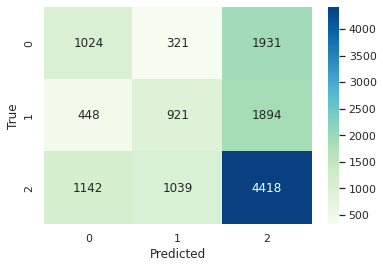

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train, y_train)
score_test = grid.score(x_test, y_test)
print('El Accuracy del modelo evaluando el set de train es: ', score_train, ' y el Accuracy del modelo evaluando el set de test es: ', score_test)

El Accuracy del modelo evaluando el set de train es:  0.9955661274976213  y el Accuracy del modelo evaluando el set de test es:  0.4843202922819303


Luego entrenamos un modelo K-nearest neighbours con las variables reducidas

In [ ]:
param_grid = {
    'n_neighbors': [7],
    'algorithm': ['ball_tree'],
    'weights': ['distance'],
    'n_jobs':[-1],
    'leaf_size':[20]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(x_train_red, y_train) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [20],
                         'n_jobs': [-1], 'n_neighbors': [7],
                         'weights': ['distance']})

In [ ]:
grid.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_jobs': -1,
 'n_neighbors': 7,
 'weights': 'distance'}

In [ ]:
y_pred = grid.predict(x_test_red)

pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])

test   pred
0       alto   alto
1      medio   alto
2      medio  medio
3      medio   alto
4       alto  medio
...      ...    ...
13133  medio  medio
13134   bajo  medio
13135   alto   alto
13136   alto  medio
13137   alto  medio

[13138 rows x 2 columns]

Text(30.5, 0.5, 'True')

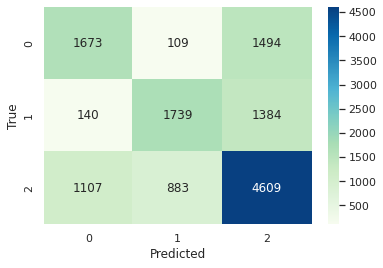

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train_red, y_train_red)
score_test = grid.score(x_test_red, y_test_red)
print('El Accuracy del modelo evaluando el set de train reducido es: ', score_train, ' y el Accuracy del modelo evaluando el set de test reducido es: ', score_test)

El Accuracy del modelo evaluando el set de train reducido es:  0.9960989533777355  y el Accuracy del modelo evaluando el set de test reducido es:  0.6105191048865886


#  **4. Regresión**

En esta última parte del trabajo, buscaremos predecir el precio de la propiedad (variable property_price) utilizando los modelos

- KNN
- XGBoost
- Adaboost

Trabajaremos tanto con el data set de train (df), como con el resultante del item 1d (df_reduc). Como se menciono previamente, las tareas de ingenieria de caracteristicas ya fueron realizadas previamente.

## Modelo KNN

In [ ]:
df_knn = df.copy()
test_knn = test.copy()

### Analisis de correlación

Para tomar un indicio inicial, procedemos a analizar el grafico de a pares entre todas las variables de nuestro data set inicial.



In [ ]:
sns.pairplot(df_knn.iloc[:,0:15])

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fa12a633050> (for post_execute):


KeyboardInterrupt: ignored

Decidimos eliminar el ruido reduciendo la cantidad de registros del grafico, para poder verificar correlaciones.

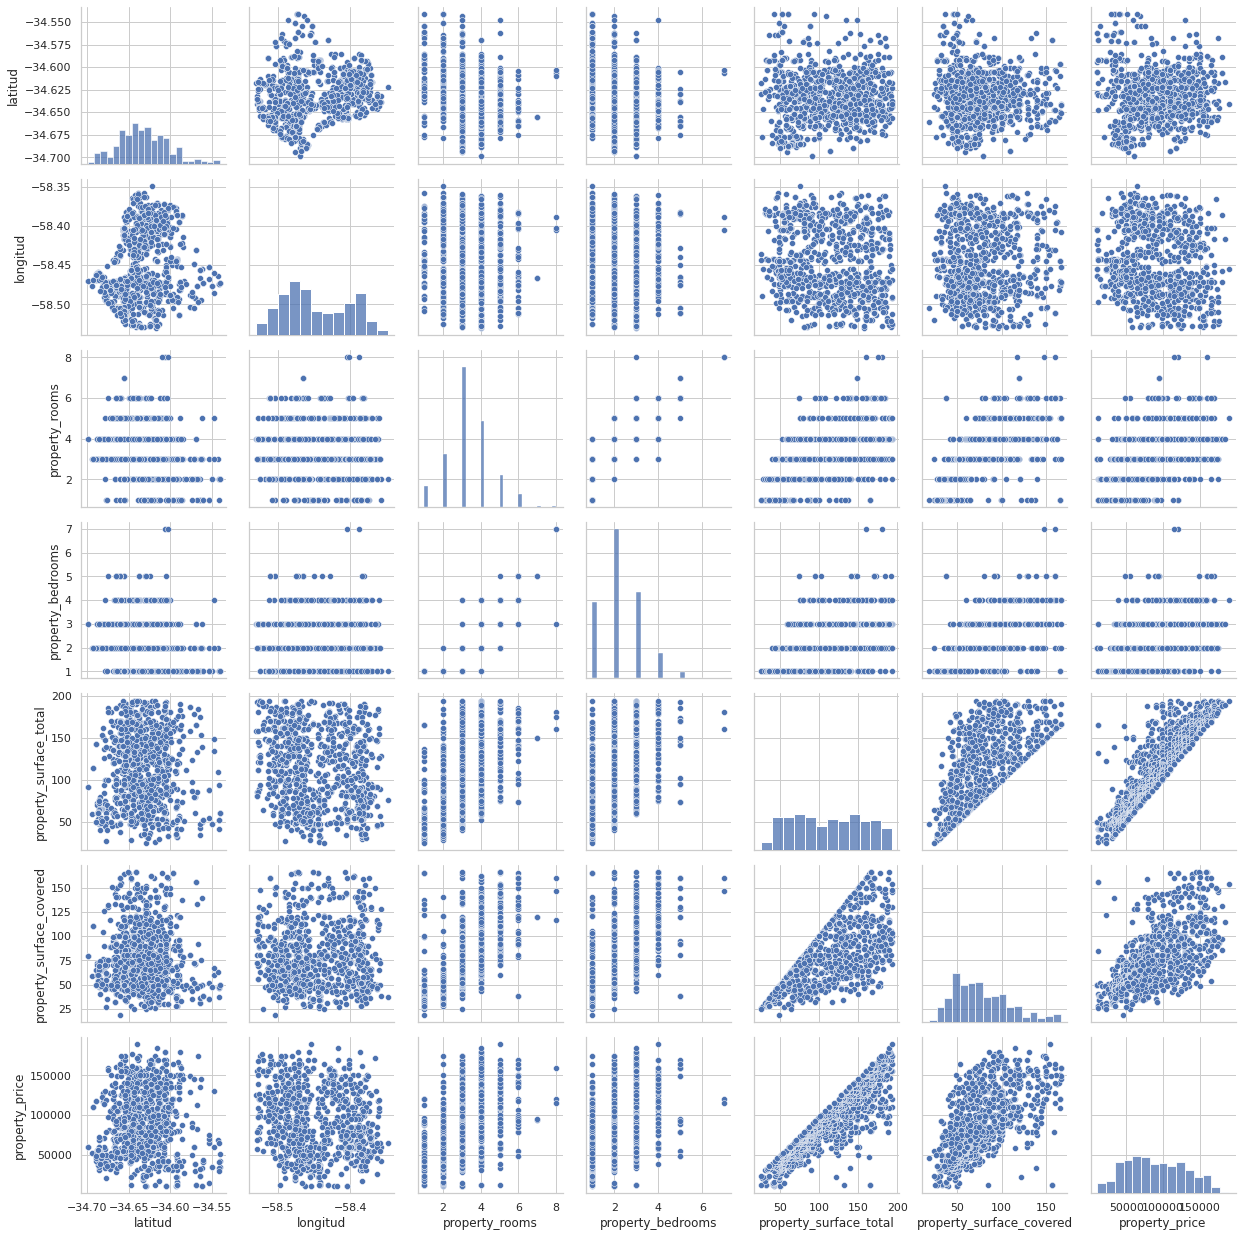

In [ ]:
sns.pairplot(df_knn.iloc[1:1000,0:15])

A continuación volvemos a analizar la correlación a traves de un Heatmap. Notamos que en las partes mas coloradas del grafico se encuentran las variables previamente que se encuentran mas fuertemente relacionadas entre si.

In [ ]:
df_knn.iloc[:,0:15].corr().style.background_gradient(cmap='coolwarm')

### Entrenamiento y Predicción

A continuacion, lo que haremos sera realizar un entrenamiento con el dataset previamente definido como test. En un primer lugar, crearemos un modelo al cual le realizaremos la prediccion.

In [ ]:
# elimino las str porque sino no puedo hacer el train test - ver despues si le aplicamos algo para hacerla numerica
df_knn.drop("property_type", inplace=True, axis=1)
df_knn.drop("place_l2", inplace=True, axis=1)
df_knn.drop("place_l3", inplace=True, axis=1)
df_knn.drop("place_l4", inplace=True, axis=1)

latitud   longitud  property_rooms  property_bedrooms  \
92828  -34.622385 -58.448886             4.0                3.0   
19975  -34.618084 -58.359912             2.0                1.0   
266756 -34.601159 -58.398106             1.0                1.0   
454638 -34.605542 -58.390007             1.0                1.0   
409114 -34.593266 -58.381426             1.0                1.0   
...           ...        ...             ...                ...   
39842  -34.597304 -58.432406             1.0                1.0   
137036 -34.581910 -58.449381             2.0                1.0   
194451 -34.604510 -58.390908             3.0                2.0   
33600  -34.657111 -58.405545             4.0                3.0   
299724 -34.580785 -58.431046             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  
92828                    113.0                      97.0        288000.0  
19975                     70.0                      65.0        450000.0  
266756                    33.0                      30.0         77243.0  
454638                    30.0                      30.0         65000.0  
409114                    40.0                      40.0         79000.0  
...                        ...                       ...             ...  
39842                     29.0                      29.0         64500.0  
137036                    56.0                      52.0        144870.0  
194451                    64.0                      64.0        110000.0  
33600                     81.0                      75.0         73000.0  
299724                    36.0                      36.0         89900.0  

[75644 rows x 7 columns]

In [ ]:
# replico los cambios con el que voy a usar para test

test_knn.drop("property_type", inplace=True, axis=1)
test_knn.drop("place_l2", inplace=True, axis=1)
test_knn.drop("place_l3", inplace=True, axis=1)
test_knn.drop("place_l4", inplace=True, axis=1)

In [ ]:
x_train = df_knn.iloc[:,0:6]
y_train = df_knn.iloc[:,6:7]
x_test = test_knn.iloc[:,0:6]
y_test = test_knn.iloc[:,6:7]

In [ ]:
knn_regressor = KNeighborsRegressor().fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

print(f"La predicción obtenida es: {y_pred}")

La predicción obtenida es: [[116500.]
 [125200.]
 [298800.]
 ...
 [185200.]
 [140360.]
 [146400.]]


### Optimización de hiperparámetros

Observemos cuales son los parámetros por default que esta teniendo nuestro modelo.

In [ ]:
knn_regressor.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

En base al entrenamiento y predicciones hechos en las celdas anteriores, notaremos la cantidad de aciertos obtenidos.

In [ ]:
print("Se obtuvo un total de", np.sum(y_test == y_pred), "aciertos, sobre un total de", len(y_test))

Se obtuvo un total de property_price    462
dtype: int64 aciertos, sobre un total de 18605


Veamos que sucede si optimizamos estos parámetros. Recordemos que los que podremos setear serán **n_neighbors**, **algorithm**, **metric** y **weights**.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

Obtuvimos los siguientes resultados

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(knn_regressor, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.66


### Análisis de performance y Métricas

Estudiamos la matriz de confusión observando la densidad de las variables en donde acertamos nuestras predicciones.

A continuación observaremos cual es la performance lograda con el modelo actual. En la siguiente tabla podremos observar para algunos registros una comparación entre su valor real y el resultado de la predicción realizada. De igual manera se calcula el error entre los mismos.

In [ ]:
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
performance.head()

ValueError: ignored

Se detallan los valores obtenidos a través las métricas realizadas:

#### Mean Square Error

Esta métrica se encarga de para cada punto, calcular la diferencia cuadrada entre las predicciones y el objetivo. Luego de esto promedia esos valores. 

Lo que buscamos es que estos sean lo mas chico posibles, ya que cuanto mayor peor es el modelo.

In [ ]:
from sklearn import metrics

mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error según la métrica 'Mean Square Error' de test es: {mse}")

El error según la métrica 'Mean Square Error' de test es: 2837058816.6769094


#### Root Mean Square Error

La diferencia con la métrica anterior es que esta es la raíz cuadrada de MSE. Lo que buscamos con esto es hacer que la escala de errores sea igual a la de los objetivos.

In [ ]:
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error según la métrica 'Root Mean Square Error' de test es: {rmse}")

El error según la métrica 'Root Mean Square Error' de test es: 53264.04806881382


#### Coeficiente de determinación R2

Lo que hace esta métrica es liberarse de la escala que poseen los valores, ya que siempre se va a encontrar entre menos infinito y 1.

In [ ]:
score_knn = knn_regressor.score(x_test, y_test)

print(f"El coeficiente de 'determinación' es: {score_knn}")

El coeficiente de 'determinación' es: 0.5910565095909068


## Modelo XGBoost

### Entrenamiento y prediccion

In [ ]:
df_xgb = df.copy()

In [ ]:
df_xgb.rename(columns={'property_price':'target'}, inplace=True)
df_xgb.target.value_counts(normalize=True)

110000.0    0.018146
85000.0     0.017598
120000.0    0.017218
125000.0    0.016822
115000.0    0.016609
              ...   
111549.0    0.000015
291785.0    0.000015
182429.0    0.000015
214899.0    0.000015
80200.0     0.000015
Name: target, Length: 3668, dtype: float64

In [ ]:
features=list(df_xgb.columns[10:14])
print(features)

['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_xgb[features].values, 
                                                    df_xgb['target'].values, 
                                                    test_size=0.2,
                                                    random_state=13)

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=0, n_estimators=100)
xgb_model.fit(x_train, y_train)

[03:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold


### Optimizacion de hiperparametros

In [ ]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
print("Se obtuvo un total de", np.sum(y_test == y_pred), "aciertos, sobre un total de", len(y_test))

Se obtuvo un total de 5 aciertos, sobre un total de 13138


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[03:36:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### Análisis de performance y métricas

In [ ]:
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
performance.head()

Valor Real  Prediccion     Error
0    168000.0    135740.0   32260.0
1     88000.0    132506.0  -44506.0
2     87000.0    252517.6 -165517.6
3     76000.0     75266.6     733.4
4     72000.0     83100.0  -11100.0

#### Mean Square Error

In [ ]:
from sklearn import metrics

mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error según la métrica 'Mean Square Error' de test es: {mse}")

El error según la métrica 'Mean Square Error' de test es: 11708120884.381979


#### Root Mean Square Error

In [ ]:
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error según la métrica 'Root Mean Square Error' de test es: {rmse}")

El error según la métrica 'Root Mean Square Error' de test es: 108204.07055366253


#### Coeficiente de determinación R2

Lo que hace esta métrica es liberarse de la escala que poseen los valores, ya que siempre se va a encontrar entre menos infinito y 1.

In [ ]:
score = xgb_model.score(x_test, y_test)

print(f"El coeficiente de 'determinación' es: {score}")

El coeficiente de 'determinación' es: 0.6374000728459787


## Modelo Adaboost

### Entrenamiento y predicción

In [ ]:
df_adb = df.copy()

In [ ]:
df_adb.rename(columns={'property_price':'target'}, inplace=True)
df_adb.target.value_counts(normalize=True)

110000.0    0.018146
85000.0     0.017598
120000.0    0.017218
125000.0    0.016822
115000.0    0.016609
              ...   
111549.0    0.000015
291785.0    0.000015
182429.0    0.000015
214899.0    0.000015
80200.0     0.000015
Name: target, Length: 3668, dtype: float64

In [ ]:
features=list(df_adb.columns[10:14])
print(features)

['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_adb[features].values, 
                                                    df_adb['target'].values, 
                                                    test_size=0.2,
                                                    random_state=13)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=100)

In [ ]:
ada_reg.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100)

### Optimización de hiperparametros

In [ ]:
ada_reg.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': None}

In [ ]:
print("Se obtuvo un total de", np.sum(y_test == y_pred), "aciertos, sobre un total de", len(y_test))

Se obtuvo un total de 5 aciertos, sobre un total de 13138


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

### Análisis de performance y métricas

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.57


In [ ]:
from sklearn.metrics import mean_squared_error


#### Mean Square Error

In [ ]:
from sklearn import metrics

mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error según la métrica 'Mean Square Error' de test es: {mse}")

El error según la métrica 'Mean Square Error' de test es: 11708120884.381979


#### Root Mean Square Error

In [ ]:
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error según la métrica 'Root Mean Square Error' de test es: {rmse}")

El error según la métrica 'Root Mean Square Error' de test es: 108204.07055366253


#### Coeficiente de determinación R2

Lo que hace esta métrica es liberarse de la escala que poseen los valores, ya que siempre se va a encontrar entre menos infinito y 1.

In [ ]:
score = xgb_model.score(x_test, y_test)

print(f"El coeficiente de 'determinación' es: {score}")

El coeficiente de 'determinación' es: 0.6374000728459787


#  **5. Conclusiones**

Para finalizar el informe, haremos un pequeño repaso sobre todos los puntos que analizamos y sus respectivos resultados y/o observaciones hechos por nosotros:
	
Con respecto a los outliers obtenidos a lo largo del trabajo, pudimos observar que contamos con una mayor certeza de determinación de los mismos al realizar análisis multivariados, dado que se cuenta con más datos del entorno. Estos valores atípicos fueron analizados a través de diferentes métodos y en su mayoría posteriormente descartados del dataset.

Por otro lado, uno de los puntos a destacar dentro de los modelos de clasificación fue la diferencia en el score entre el entrenamiento con las variables normales y reducidas en el modelo KNN. Hubo un mejoramiento notable entre ambas predicciones. Posiblemente esto sea porque al calcular las distancias entre vecinos es importante que todas las variables esten en órdenes de magnitud similares.

Otro punto interesante fue la similitud entre la clasificación que obtuvimos por árbol de decisión comparándola con el agrupamiento por K-means. Se encontró que se formaron tres grupos similares, distribuidos aproximadamente por las mismas zonas. Además, el modelo de árbol de decisión fue el más fácil de analizar gráficamente.

Para la parte de regresión estuvimos estudiando 3 modelos. Por un lado utilizamos KNN. Si bien este modelo resulta el más sencillo de todos, suele ser el que peores predicciones realiza. Pasando al XGBoost, a pesar de que obtuvimos una menor cantidad de aciertos, el porcentaje obtenido mediante kfold fue superior. Utilizando el último modelo no notamos grandes variaciones en las métricas percibidas. Cabe destacar que en los tres obtuvimos errores entre las mediciones que son extremadamente altos. Esto nos llamó mucho la atención, y lo atribuímos a algún error cometido involuntariamente durante algún procesamiento.  

A lo largo de este trabajo práctico, logramos tener un primer acercamiento con estas tareas del análisis de datos. En particular, debimos tomar muchas decisiones cuyo impacto es difícil de estimar en el resultado final. Un ejemplo de ello fue la complejidad de decidir sobre el reemplazo de valores nulos en el dataset original de manera que no afecte la distribución natural de los datos. Concluimos, entonces, que el análisis de datos es una tarea compleja y para hacerlo de manera eficiente se tienen que realizar diversos y detallados análisis de todas las variables comprometidas.

